# Load Data

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
msn02= pd.read_csv("/content/drive/MyDrive/IE/CORPORATE_PROJECT_AIRBUS/01_DATA/msn_02_fuel_leak_signals_preprocessed.csv", delimiter=';')


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/IE/CORPORATE_PROJECT_AIRBUS/01_DATA/msn_02_fuel_leak_signals_preprocessed.csv'

In [3]:
msn02.info(verbose=True)

NameError: name 'msn02' is not defined

UTC to datetime

In [4]:
# Convert 'UTC_TIME' to datetime
msn02['UTC_TIME'] = pd.to_datetime(msn02['UTC_TIME'])

# Create new columns for date and time
msn02['DATE'] = msn02['UTC_TIME'].dt.date
msn02['TIME'] = msn02['UTC_TIME'].dt.time

NameError: name 'msn02' is not defined

# Remove categorical and boolean features

In [257]:
msn02 = msn02.select_dtypes(include=['int64', 'float64',"datetime64[ns]","object"])


In [258]:
msn02.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623580 entries, 0 to 623579
Data columns (total 55 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   UTC_TIME                           623580 non-null  datetime64[ns]
 1   MSN                                623580 non-null  object        
 2   Flight                             623580 non-null  object        
 3   FLIGHT_PHASE_COUNT                 560658 non-null  float64       
 4   FUEL_FLOW_1                        514937 non-null  float64       
 5   FUEL_FLOW_2                        516594 non-null  float64       
 6   FUEL_FLOW_3                        516599 non-null  float64       
 7   FUEL_FLOW_4                        514711 non-null  float64       
 8   FUEL_PITCH                         560314 non-null  float64       
 9   FUEL_ROLL                          560314 non-null  float64       
 10  FUEL_TRANSFER_MODE_V

Remove noise with python without effecting the information of the signal (Gaussian Filter)

# NaN's

In [259]:
msn02 = msn02[~msn02['FLIGHT_PHASE_COUNT'].isin([1, 12])]


In [260]:
msn02.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 554061 entries, 0 to 623579
Data columns (total 55 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   UTC_TIME                           554061 non-null  datetime64[ns]
 1   MSN                                554061 non-null  object        
 2   Flight                             554061 non-null  object        
 3   FLIGHT_PHASE_COUNT                 491139 non-null  float64       
 4   FUEL_FLOW_1                        490668 non-null  float64       
 5   FUEL_FLOW_2                        491179 non-null  float64       
 6   FUEL_FLOW_3                        491179 non-null  float64       
 7   FUEL_FLOW_4                        490668 non-null  float64       
 8   FUEL_PITCH                         491197 non-null  float64       
 9   FUEL_ROLL                          491197 non-null  float64       
 10  FUEL_TRANSFER_MODE_V

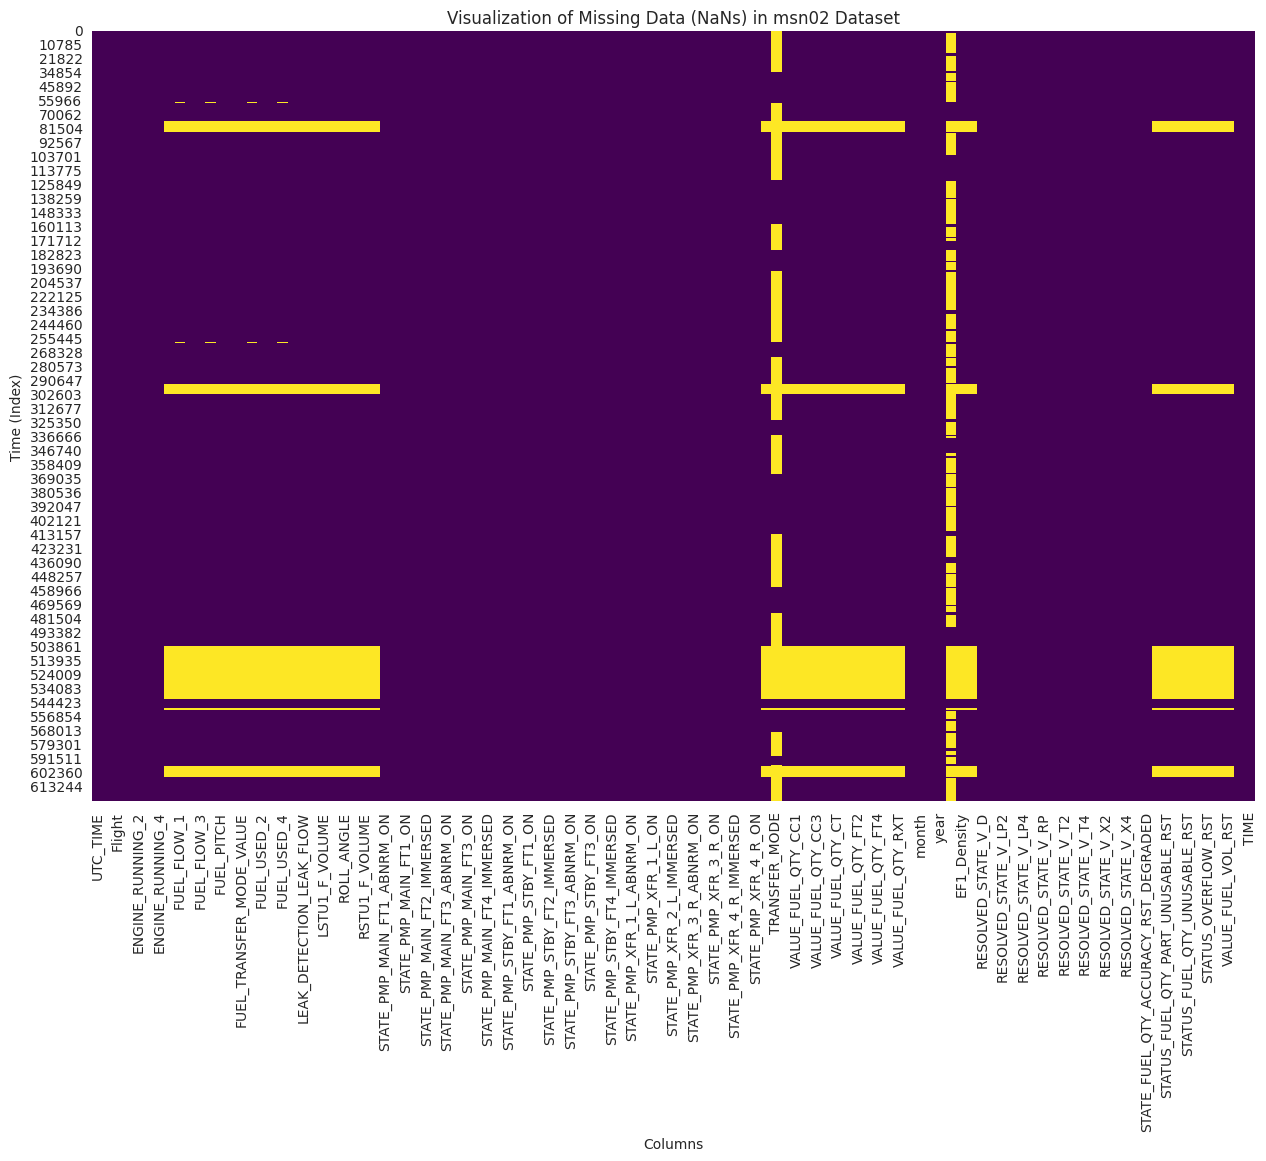

In [188]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame indicating where NaNs are in msn02
nan_df_msn02 = msn02.isnull()

# Visualizing missing data (NaNs) in msn02
plt.figure(figsize=(15, 10))
sns.heatmap(nan_df_msn02, cbar=False, cmap='viridis')
plt.title('Visualization of Missing Data (NaNs) in msn02 Dataset')
plt.xlabel('Columns')
plt.ylabel('Time (Index)')
plt.show()



In [261]:
# Calculate percentage of NaNs for each column in msn02
nan_percentage_msn02 = msn02.isnull().mean() * 100

# Display the percentage of NaNs for each column in msn02
print(nan_percentage_msn02)


UTC_TIME                              0.000000
MSN                                   0.000000
Flight                                0.000000
FLIGHT_PHASE_COUNT                   11.356511
FUEL_FLOW_1                          11.441520
FUEL_FLOW_2                          11.349292
FUEL_FLOW_3                          11.349292
FUEL_FLOW_4                          11.441520
FUEL_PITCH                           11.346043
FUEL_ROLL                            11.346043
FUEL_TRANSFER_MODE_VALUE             11.349111
FUEL_USED_1                          11.440437
FUEL_USED_2                          11.348209
FUEL_USED_3                          11.348931
FUEL_USED_4                          11.441159
FW_GEO_ALTITUDE                      11.343516
LEAK_DETECTION_LEAK_FLOW             11.346224
LSTU1_A_VOLUME                       11.344238
LSTU1_F_VOLUME                       11.344238
PITCH_ANGLE                          11.343516
ROLL_ANGLE                           11.343697
RSTU1_A_VOLUM

In [270]:
# Check for NaN values in the specified columns and get the associated FLIGHT_PHASE_COUNT values
nan_phases_fob = msn02[msn02['VALUE_FOB'].isna()]['FLIGHT_PHASE_COUNT'].unique()
nan_phases_fuel_used_1 = msn02[msn02['FUEL_USED_1'].isna()]['FLIGHT_PHASE_COUNT'].unique()
nan_phases_fuel_used_2 = msn02[msn02['FUEL_USED_2'].isna()]['FLIGHT_PHASE_COUNT'].unique()
nan_phases_fuel_used_3 = msn02[msn02['FUEL_USED_3'].isna()]['FLIGHT_PHASE_COUNT'].unique()
nan_phases_fuel_used_4 = msn02[msn02['FUEL_USED_4'].isna()]['FLIGHT_PHASE_COUNT'].unique()

# Combine all unique phases with NaN values across the columns into a single set for uniqueness
all_nan_phases = set(nan_phases_fob) | set(nan_phases_fuel_used_1) | set(nan_phases_fuel_used_2) | set(nan_phases_fuel_used_3) | set(nan_phases_fuel_used_4)

# Display the unique flight phases with NaN values
all_nan_phases


set()

Flight Phases 1.0 and 2.0: These phases have NaN values in at least one of the columns (VALUE_FOB, FUEL_USED_1 through FUEL_USED_4). This suggests that during these early phases of the flight, some data related to fuel usage or onboard fuel value might be missing or not recorded.

Flight Phase 12.0: Similarly, this phase also has missing data in the same columns for some records. It indicates that towards this later phase of the flight, there are instances where fuel-related data is not available.

nan in Flight Phases: The presence of nan in the set of unique flight phases suggests that there are records in your dataset where the FLIGHT_PHASE_COUNT itself is not available (i.e., it is NaN) and that these records also have missing data in the fuel-related columns. This points to a broader issue of missing data, not just in fuel measurements but also in flight phase identification.

In [263]:

# Step 1: Fill NaN in Flight Phase with the closest non-null value
msn02['FLIGHT_PHASE_COUNT'] = msn02['FLIGHT_PHASE_COUNT'].fillna(method='ffill').fillna(method='bfill')


In [265]:

# Step 2: Fill NaN in FUEL_USED_1 - FUEL_USED_4 for Phases 1 and 12 with 0 --> because indicate turned of engine
for col in ['FUEL_USED_1', 'FUEL_USED_2', 'FUEL_USED_3', 'FUEL_USED_4']:
    msn02.loc[msn02['FLIGHT_PHASE_COUNT'].isin([1, 12]), col] = msn02.loc[msn02['FLIGHT_PHASE_COUNT'].isin([1, 12]), col].fillna(0)


In [267]:
# Step 3: Interpolate over VALUE_FOB and FUEL_USED_1 - FUEL_USED_4 polynomial order 2 for Flight Phase 2

# Isolate rows corresponding to Phase 2
phase_2_indices = msn02[msn02['FLIGHT_PHASE_COUNT'] == 2].index

# Specify columns to interpolate
columns_to_interpolate = ['VALUE_FOB', 'FUEL_USED_1', 'FUEL_USED_2', 'FUEL_USED_3', 'FUEL_USED_4']

# Apply polynomial interpolation of degree 2 for the specified columns only within Phase 2
msn02.loc[phase_2_indices, columns_to_interpolate] = msn02.loc[phase_2_indices, columns_to_interpolate].interpolate(method='linear')

# Handle potential NaN values at the start or end after interpolation
msn02.loc[phase_2_indices, columns_to_interpolate] = msn02.loc[phase_2_indices, columns_to_interpolate].fillna(method='ffill').fillna(method='bfill')


In [268]:
# Step 4: Interpolate over VALUE_FOB and FUEL_USED_1 - FUEL_USED_4 polynomial order 2 for Flight Phase 8

# Isolate rows corresponding to Phase 8
phase_2_indices = msn02[msn02['FLIGHT_PHASE_COUNT'] == 8].index

# Specify columns to interpolate
columns_to_interpolate = ['VALUE_FOB', 'FUEL_USED_1', 'FUEL_USED_2', 'FUEL_USED_3', 'FUEL_USED_4']

# Apply polynomial interpolation of degree 2 for the specified columns only within Phase 2
msn02.loc[phase_2_indices, columns_to_interpolate] = msn02.loc[phase_2_indices, columns_to_interpolate].interpolate(method='linear')

# Handle potential NaN values at the start or end after interpolation
msn02.loc[phase_2_indices, columns_to_interpolate] = msn02.loc[phase_2_indices, columns_to_interpolate].fillna(method='ffill').fillna(method='bfill')


In [269]:
# Step 4: Interpolate over VALUE_FOB and FUEL_USED_1 - FUEL_USED_4 polynomial order 2 for Flight Phase 11

# Isolate rows corresponding to Phase
phase_2_indices = msn02[msn02['FLIGHT_PHASE_COUNT'] == 11].index

# Specify columns to interpolate
columns_to_interpolate = ['VALUE_FOB', 'FUEL_USED_1', 'FUEL_USED_2', 'FUEL_USED_3', 'FUEL_USED_4']

# Apply polynomial interpolation of degree 2 for the specified columns only within Phase 2
msn02.loc[phase_2_indices, columns_to_interpolate] = msn02.loc[phase_2_indices, columns_to_interpolate].interpolate(method='linear')

# Handle potential NaN values at the start or end after interpolation
msn02.loc[phase_2_indices, columns_to_interpolate] = msn02.loc[phase_2_indices, columns_to_interpolate].fillna(method='ffill').fillna(method='bfill')


In [162]:
# Step 5: filling NaN VALUE_FOB  for PHASE 1 with the first value of Phase 2

# Identify the first non-NaN VALUE_FOB in Phase 2 for each flight
#first_value_phase_2 = msn02[msn02['FLIGHT_PHASE_COUNT'] == 2].groupby('Flight')['VALUE_FOB'].first()

# Apply this value to NaNs in Phase 1
#for flight, value in first_value_phase_2.items():
 #   msn02.loc[(msn02['Flight'] == flight) & (msn02['FLIGHT_PHASE_COUNT'] == 1) & (msn02['VALUE_FOB'].isna()), 'VALUE_FOB'] = value



In [163]:
# Step 6: filling NaN VALUE_FOB  for PHASE 12   with the last value of Phase 11

# Identify the last non-NaN VALUE_FOB in Phase 11 for each flight
#last_value_phase_11 = msn02[msn02['FLIGHT_PHASE_COUNT'] == 11].groupby('Flight')['VALUE_FOB'].last()

# Apply this value to NaNs in Phase 12
#for flight, value in last_value_phase_11.items():
 #   msn02.loc[(msn02['Flight'] == flight) & (msn02['FLIGHT_PHASE_COUNT'] == 12) & (msn02['VALUE_FOB'].isna()), 'VALUE_FOB'] = value


In [271]:
# Calculate percentage of NaNs for each column in msn02
nan_percentage_msn02 = msn02.isnull().mean() * 100

# Display the percentage of NaNs for each column in msn02
print(nan_percentage_msn02)

UTC_TIME                              0.000000
MSN                                   0.000000
Flight                                0.000000
FLIGHT_PHASE_COUNT                    0.000000
FUEL_FLOW_1                          11.441520
FUEL_FLOW_2                          11.349292
FUEL_FLOW_3                          11.349292
FUEL_FLOW_4                          11.441520
FUEL_PITCH                           11.346043
FUEL_ROLL                            11.346043
FUEL_TRANSFER_MODE_VALUE             11.349111
FUEL_USED_1                           0.000000
FUEL_USED_2                           0.000000
FUEL_USED_3                           0.000000
FUEL_USED_4                           0.000000
FW_GEO_ALTITUDE                      11.343516
LEAK_DETECTION_LEAK_FLOW             11.346224
LSTU1_A_VOLUME                       11.344238
LSTU1_F_VOLUME                       11.344238
PITCH_ANGLE                          11.343516
ROLL_ANGLE                           11.343697
RSTU1_A_VOLUM

So now no more NAN's in **FLIGHT_PHASE_COUNT , VALUE_FOB, FUEL_USED_1 - FUEL_USED_4**




### Interpolation (SKIP THIS PART BECAUSE ALREADY DONE ABOVE)

In [1]:
## Ensure msn02 is your DataFrame
import pandas as pd
import numpy as np


# Apply linear interpolation
msn02_linear = msn02.copy()
msn02_linear[["VALUE_FOB","FUEL_USED_1","FUEL_USED_2","FUEL_USED_3","FUEL_USED_4"]] = msn02_linear[["VALUE_FOB","FUEL_USED_1","FUEL_USED_2","FUEL_USED_3","FUEL_USED_4"]].interpolate(method='linear')

# Apply polynomial interpolation of order 2
msn02_poly_2 = msn02.copy()
msn02_poly_2[["VALUE_FOB","FUEL_USED_1","FUEL_USED_2","FUEL_USED_3","FUEL_USED_4"]] = msn02_poly_2[["VALUE_FOB","FUEL_USED_1","FUEL_USED_2","FUEL_USED_3","FUEL_USED_4"]].interpolate(method='polynomial', order=2)

# Apply polynomial interpolation of order 3
msn02_poly_3 = msn02.copy()
msn02_poly_3[["VALUE_FOB","FUEL_USED_1","FUEL_USED_2","FUEL_USED_3","FUEL_USED_4"]] = msn02_poly_3[["VALUE_FOB","FUEL_USED_1","FUEL_USED_2","FUEL_USED_3","FUEL_USED_4"]].interpolate(method='polynomial', order=5)


NameError: name 'msn02' is not defined

In [11]:
msn02_poly_2 = msn02_poly_2.drop(msn02_poly_2.index[0])

# Reset the index if you want to maintain a sequential index after dropping the row
msn02_poly_2 = msn02_poly_2.reset_index(drop=True)

Choosing the interpolation method that best maintains the integrity of your dataset. Considering the nature of our data, the degree of smoothing or fitting required, and any domain-specific requirements.

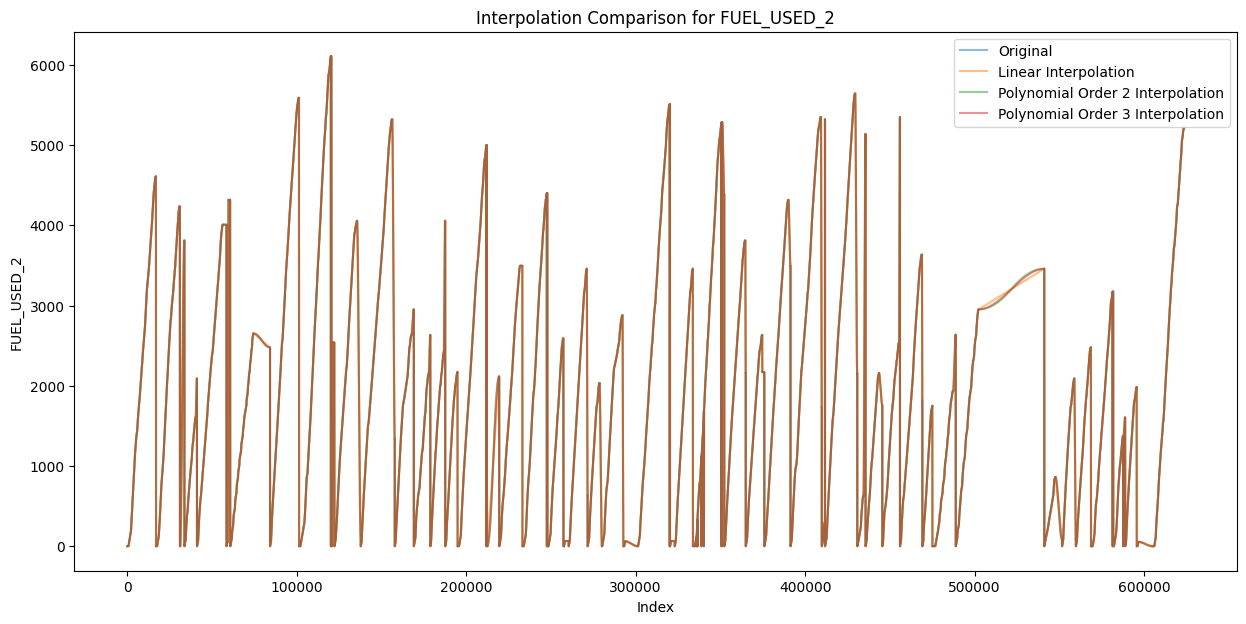

In [12]:
import matplotlib.pyplot as plt

# Example column for analysis
column = 'FUEL_USED_2'  # Replace with a relevant column name from your dataset

plt.figure(figsize=(15, 7))

# Plotting the original data
plt.plot(msn02.index, msn02[column], label='Original', alpha=0.5)

# Plotting the linearly interpolated data
plt.plot(msn02_linear.index, msn02_linear[column], label='Linear Interpolation', alpha=0.5)

# Plotting the polynomial order 2 interpolated data
plt.plot(msn02_poly_2.index, msn02_poly_2[column], label='Polynomial Order 2 Interpolation', alpha=0.5)

# Plotting the polynomial order 3 interpolated data
plt.plot(msn02_poly_3.index, msn02_poly_3[column], label='Polynomial Order 3 Interpolation', alpha=0.5)

plt.legend()
plt.title(f'Interpolation Comparison for {column}')
plt.xlabel('Index')
plt.ylabel(column)
plt.show()



In [13]:
# Display summary statistics for the original and interpolated data
print("Original Data Summary:")
print(msn02[column].describe())

print("\nLinear Interpolation Summary:")
print(msn02_linear[column].describe())

print("\nPolynomial Order 2 Interpolation Summary:")
print(msn02_poly_2[column].describe())

print("\nPolynomial Order 3 Interpolation Summary:")
print(msn02_poly_3[column].describe())


Original Data Summary:
count    516600.000000
mean       1918.099447
std        1465.217970
min           0.000000
25%         700.158275
50%        1703.080000
75%        2865.129000
max        6108.795000
Name: FUEL_USED_2, dtype: float64

Linear Interpolation Summary:
count    623579.000000
mean       1966.667742
std        1455.071710
min           0.000000
25%         704.049200
50%        1830.307000
75%        3061.177658
max        6108.795000
Name: FUEL_USED_2, dtype: float64

Polynomial Order 2 Interpolation Summary:
count    6.235790e+05
mean     1.966668e+03
std      1.460866e+03
min     -9.891929e-65
25%      6.961497e+02
50%      1.833750e+03
75%      3.032048e+03
max      6.108795e+03
Name: FUEL_USED_2, dtype: float64

Polynomial Order 3 Interpolation Summary:
count    6.235790e+05
mean     1.966668e+03
std      1.459488e+03
min     -1.618789e-48
25%      6.982436e+02
50%      1.833016e+03
75%      3.039199e+03
max      6.108795e+03
Name: FUEL_USED_2, dtype: float64


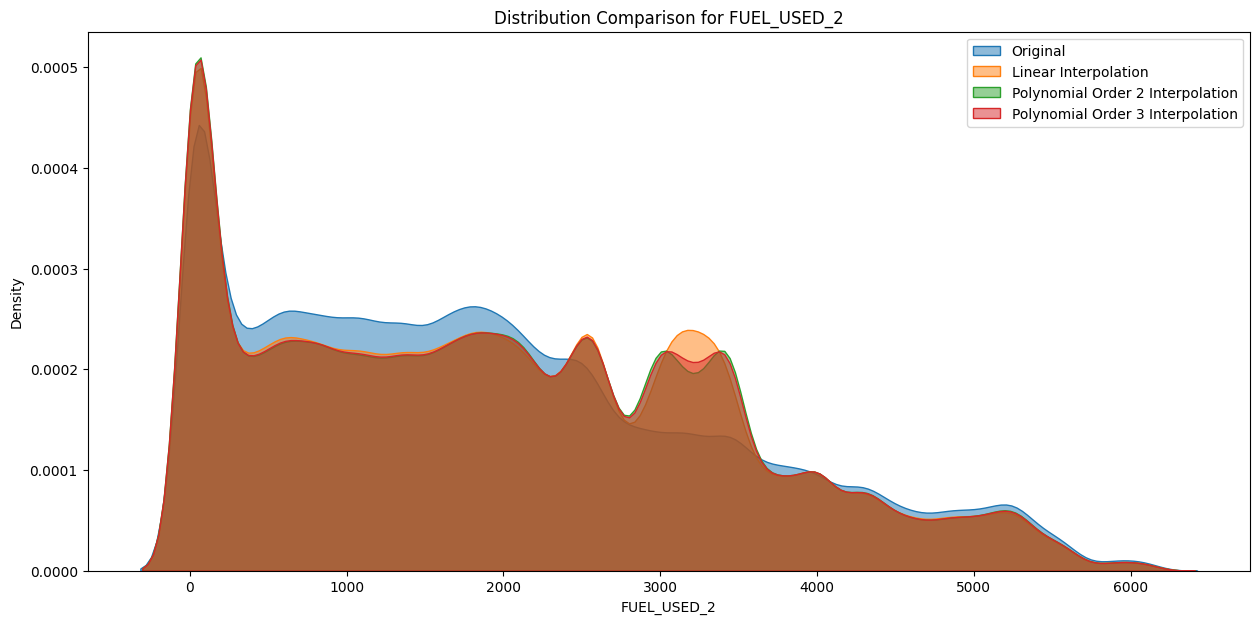

In [14]:
import seaborn as sns

plt.figure(figsize=(15, 7))

sns.kdeplot(msn02[column], label='Original', fill=True, alpha=0.5)
sns.kdeplot(msn02_linear[column], label='Linear Interpolation', fill=True, alpha=0.5)
sns.kdeplot(msn02_poly_2[column], label='Polynomial Order 2 Interpolation', fill=True, alpha=0.5)
sns.kdeplot(msn02_poly_3[column], label='Polynomial Order 3 Interpolation', fill=True, alpha=0.5)

plt.legend()
plt.title(f'Distribution Comparison for {column}')
plt.xlabel(column)
plt.ylabel('Density')
plt.show()


## Smoothing with Gaussian Filter

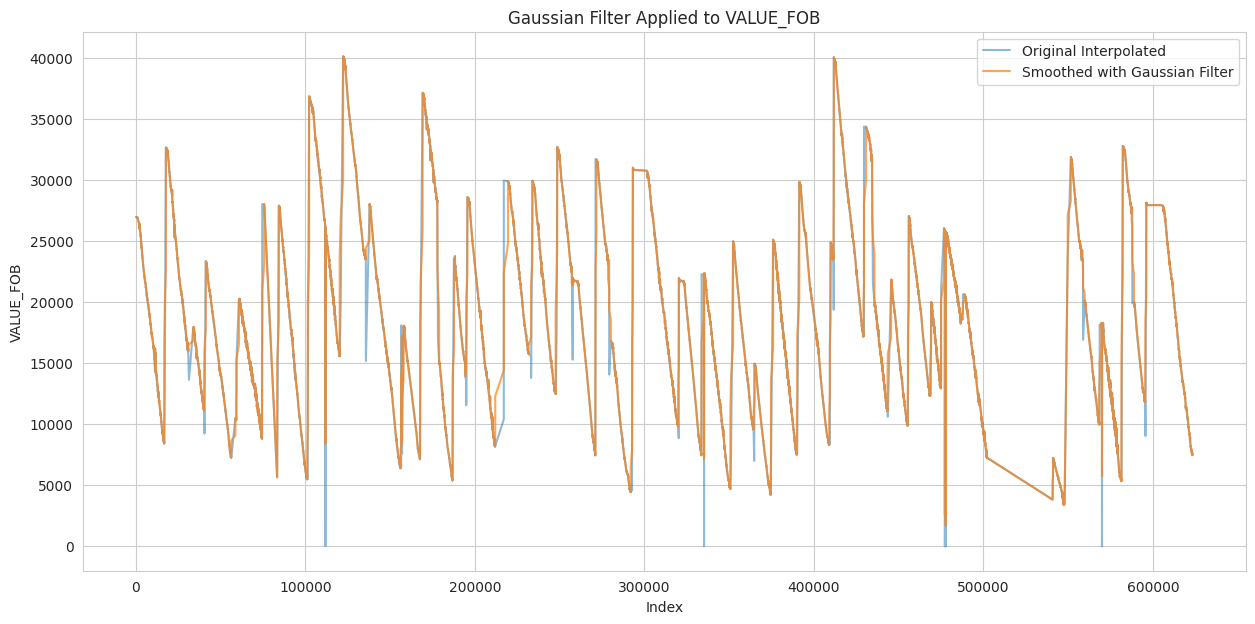

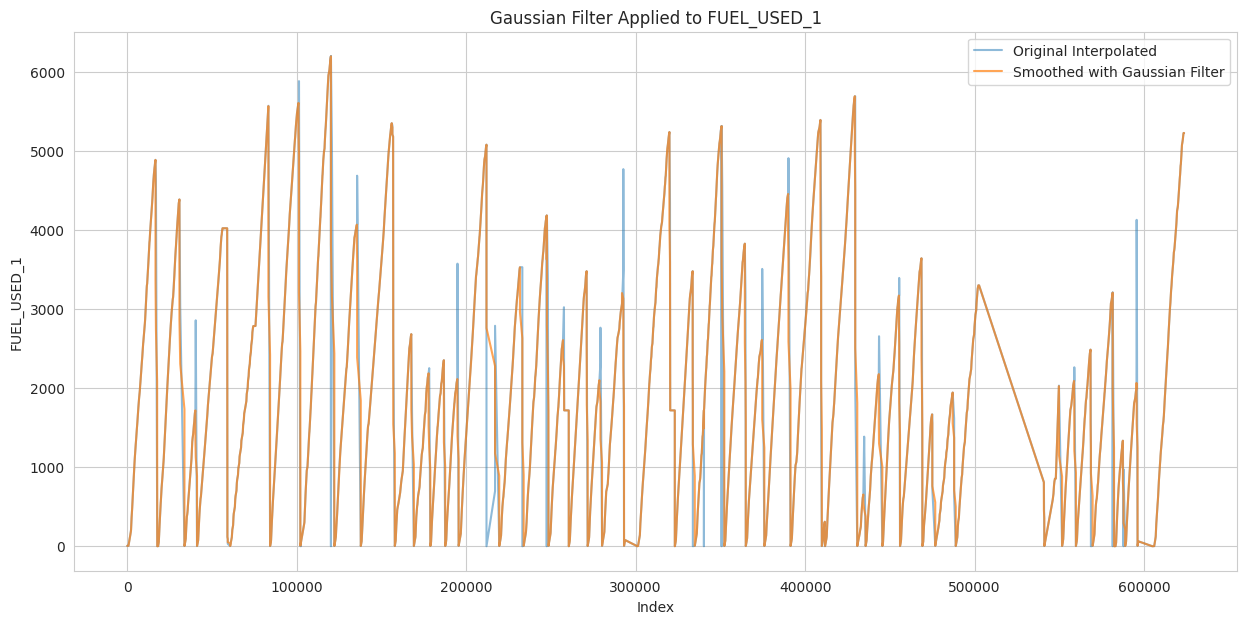

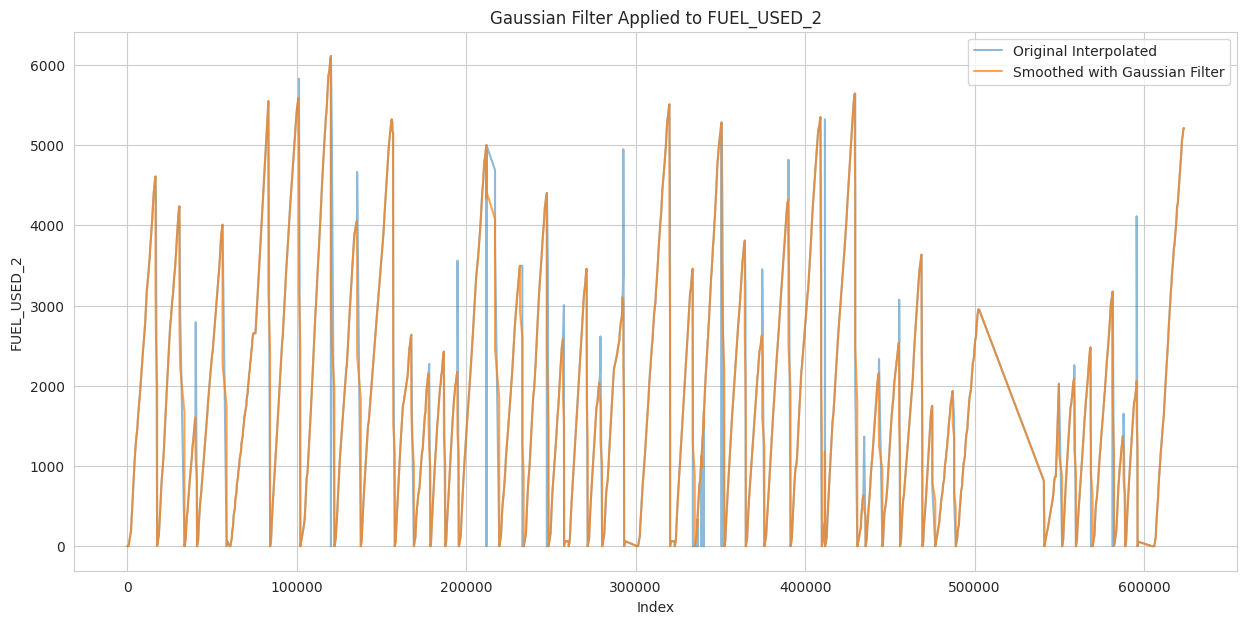

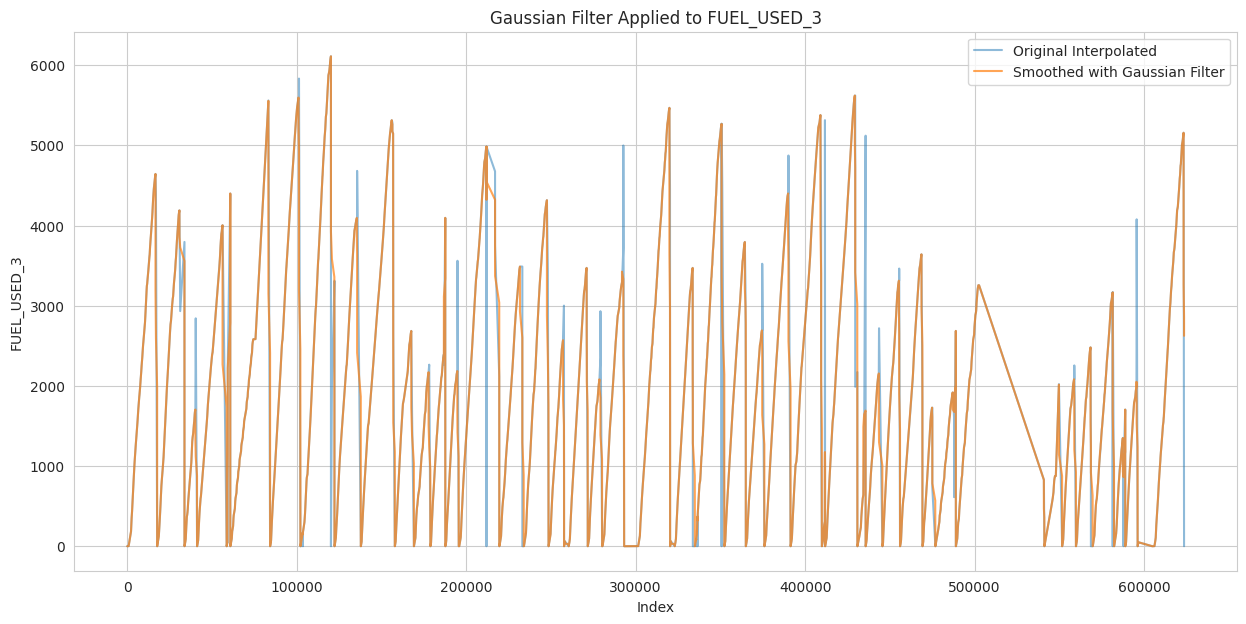

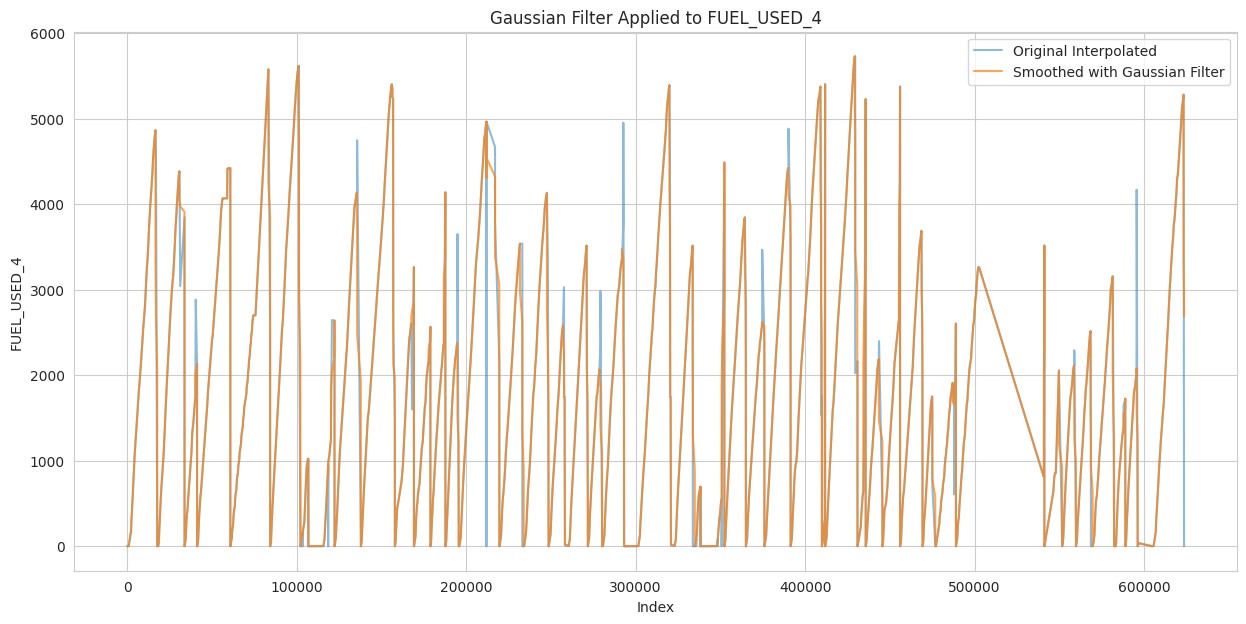

In [272]:
from scipy.ndimage import gaussian_filter1d

# Define the sigma for Gaussian smoothing
sigma = 3  # Adjust this value based on your specific needs

# List of columns to be smoothed
columns_to_smooth = ['VALUE_FOB', 'FUEL_USED_1', 'FUEL_USED_2', 'FUEL_USED_3', 'FUEL_USED_4']

# Apply Gaussian filter to each column and create a new smoothed column
for col in columns_to_smooth:
    msn02[f'{col}_smoothed'] = gaussian_filter1d(msn02[col], sigma)

    # Visualize the smoothed versus original data for one of the columns, e.g., 'VALUE_FOB'
    plt.figure(figsize=(15, 7))
    plt.plot(msn02.index, msn02[col], label='Original Interpolated', alpha=0.5)
    plt.plot(msn02.index, msn02[f'{col}_smoothed'], label='Smoothed with Gaussian Filter', alpha=0.7)
    plt.legend()
    plt.title(f'Gaussian Filter Applied to {col}')
    plt.xlabel('Index')
    plt.ylabel(col)
    plt.show()


# Feature Engineering MSNO2

In [274]:

# Calculating the sum of fuel used and total fuel quantity for msn02
msn02["FUEL_USED_TOTAL"] = msn02["FUEL_USED_1"] + msn02["FUEL_USED_2"] + msn02["FUEL_USED_3"] + msn02["FUEL_USED_4"]

msn02["FUEL_USED_TOTAL_smoothed"] = (msn02["FUEL_USED_1_smoothed"] + msn02["FUEL_USED_2_smoothed"] +
                                     msn02["FUEL_USED_3_smoothed"] + msn02["FUEL_USED_4_smoothed"])


# Calculate the change in FOB for each second within each flight for msn02
#msn02['FOB_change'] = msn02.groupby('Flight')['VALUE_FOB'].diff().abs()
#msn02["FOB_change_smoothed"]= msn02.groupby('Flight')['VALUE_FOB_smoothed'].diff().abs()

msn02["FUEL_USED_TOTAL_change"]=msn02.groupby("Flight")["FUEL_USED_TOTAL"].diff()
msn02["FUEL_USED_TOTAL_change_smoothed"]=msn02.groupby("Flight")["FUEL_USED_TOTAL_smoothed"].diff()

#filled the first row
msn02["FUEL_USED_TOTAL_change"] = msn02["FUEL_USED_TOTAL_change"].fillna(0)
msn02["FUEL_USED_TOTAL_change_smoothed"] = msn02["FUEL_USED_TOTAL_change"].fillna(0)


msn02['Time_diff_seconds'] = msn02.groupby('Flight')['UTC_TIME'].diff().dt.total_seconds().fillna(0)


msn02['FUEL_USED_TOTAL_cumulative'] = msn02.groupby('Flight')['FUEL_USED_TOTAL_change'].cumsum()
msn02['FUEL_USED_TOTAL_cumulative_smoothed'] = msn02.groupby('Flight')['FUEL_USED_TOTAL_change_smoothed'].cumsum()




In [276]:
# Group by 'Flight' and transform 'VALUE_FOB' to get the first value for each flight
msn02['VALUE_FOB_first'] = msn02.groupby('Flight')['VALUE_FOB'].transform('first')
msn02['VALUE_FOB_smoothed_first'] = msn02.groupby('Flight')['VALUE_FOB_smoothed'].transform('first')


# Group by 'Flight' and transform 'VALUE_FOB' to get the first value for each flight
#msn02['FUEL_USED_TOTAL_cumulative_last'] = msn02.groupby('Flight')['FUEL_USED_TOTAL_cumulative'].transform('last')



# Recalculate FOB_EST using the first VALUE_FOB of each flight
msn02["FOB_EST"] = msn02["VALUE_FOB_first"] - msn02["FUEL_USED_TOTAL_cumulative"] # the total used fuel per flight to each second

# Recalculate FOB_EST_smoothed using the first VALUE_FOB_smoothed of each flight
msn02["FOB_EST_smoothed"] = msn02["VALUE_FOB_smoothed_first"] - msn02["FUEL_USED_TOTAL_cumulative_smoothed"]



In [21]:
# Calculate LEAKAGE by subtracting VALUE_FOB from FOB_EST
#msn02["LEAKAGE"] = msn02["FOB_EST"] - msn02["VALUE_FOB"]


# Calculate LEAKAGE_smoothed by subtracting VALUE_FOB_smoothed from FOB_EST_smoothed
#msn02["LEAKAGE_smoothed"] = msn02["FOB_EST_smoothed"] - msn02["VALUE_FOB_smoothed"]


In [277]:
for element in list(msn02["Flight"].unique()):
  import matplotlib.pyplot as plt
  relation_FOB_FUSED = msn02[msn02["Flight"] == element]# & (msn10["FLIGHT_PHASE_COUNT"] == 8)]
  # Plotting
  plt.figure(figsize=(10, 6))
  plt.plot(relation_FOB_FUSED['UTC_TIME'], relation_FOB_FUSED['VALUE_FOB'], label='FOB Value')
  #plt.plot(relation_FOB_FUSED['UTC_TIME'], relation_FOB_FUSED['Value_FOB_with_leak'], label='FOB Value WITH LEAK')
  #plt.plot(relation_FOB_FUSED['UTC_TIME'], relation_FOB_FUSED['FUEL_USED_TOTAL_cumulative'], label="ToTal used fuel")
  plt.plot(relation_FOB_FUSED['UTC_TIME'], relation_FOB_FUSED['FOB_EST'], label='EST. FOB Value')
  plt.plot(relation_FOB_FUSED['UTC_TIME'], relation_FOB_FUSED['FUEL_USED_TOTAL'], label='Fuel used total')
  plt.xlabel('UTC Time')
  plt.ylabel('Value')
  plt.title(f'FOB Value and EST FOB Value -  Over Time for Flight {element}')
  plt.legend()
  plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
  plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
  plt.show()

Output hidden; open in https://colab.research.google.com to view.

# CREATE LEAKAGES BASED ON HISTORICAL FLIGHTS in MSN02

In [238]:
msn02.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 554061 entries, 0 to 623579
Data columns (total 69 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   UTC_TIME                             554061 non-null  datetime64[ns]
 1   MSN                                  554061 non-null  object        
 2   Flight                               554061 non-null  object        
 3   FLIGHT_PHASE_COUNT                   554061 non-null  float64       
 4   FUEL_FLOW_1                          490668 non-null  float64       
 5   FUEL_FLOW_2                          491179 non-null  float64       
 6   FUEL_FLOW_3                          491179 non-null  float64       
 7   FUEL_FLOW_4                          490668 non-null  float64       
 8   FUEL_PITCH                           491197 non-null  float64       
 9   FUEL_ROLL                            491197 non-null  float64       
 

In [169]:
msn02["Flight"].unique()

array(['V0136', 'V0133', 'V0926', 'V0837', 'V0626', 'V0929', 'V0095',
       'V0623', 'V0965', 'V0344', 'V0346', 'V0835', 'V0624', 'V0097',
       'V0962', 'V0098', 'V0134', 'V0889', 'V0348', 'V0140', 'V0135',
       'V0099', 'V0925', 'V0834', 'V0625', 'V0963', 'V0886', 'V0966',
       'V0347', 'V0833', 'V0622', 'V0964', 'V0884', 'V0138', 'V0345',
       'V0890', 'V0836', 'V0928', 'V0094', 'V0132', 'V0927', 'V0137'],
      dtype=object)

In [239]:
import pandas as pd
import numpy as np

# Assuming msn02 is your DataFrame containing flight data.

# Define leakage rates and prepare to iterate through them
leakage_rates = [0.3, 0.5, 0.8]

# Initialize the start date for artificial flights to be a day after the last UTC_TIME in msn02
last_utc = pd.to_datetime(msn02['UTC_TIME'].max())
start_date = last_utc + pd.Timedelta(days=1)

# Store all new flights here
new_flights = []

# For each leakage rate, select 10 random flights and create artificial versions
for leakage_rate in leakage_rates:
    # Reset start_sequence for each batch of 10 flights to ensure unique naming
    start_sequence = 1
    random_flights = np.random.choice(msn02['Flight'].unique(), 10, replace=False)

    for flight_index, flight in enumerate(random_flights, start=1):
        flight_data = msn02[msn02['Flight'] == flight].copy()
        new_flight_name = f"Artificial_V{start_sequence + flight_index:04d}_{leakage_rate}"
        flight_data['Flight'] = new_flight_name

        # Create the new column by copying VALUE_FOB
        flight_data['Value_FOB_with_leak'] = flight_data['VALUE_FOB_smoothed']

        # Shift UTC_TIME for the artificial flight
        flight_data['UTC_TIME'] = pd.date_range(start=start_date, periods=len(flight_data), freq='S')

        # Identify valid start points for leakage (excluding phases 1 and 12)
        valid_start_points = flight_data[(flight_data['FLIGHT_PHASE_COUNT'] > 1) & (flight_data['FLIGHT_PHASE_COUNT'] < 12)].index

        if not valid_start_points.empty:
            leakage_start_point = np.random.choice(valid_start_points)
            # Apply the extra fuel loss per second after the leakage start point
            for i in range(leakage_start_point, len(flight_data)):
                if i >= leakage_start_point:
                    flight_data.loc[i, 'Value_FOB_with_leak'] -= leakage_rate

        # Update start_date for the next artificial flight
        start_date = flight_data['UTC_TIME'].max() + pd.Timedelta(days=1)

        # Append modified flight_data to new_flights
        new_flights.append(flight_data)

        # Increment start_sequence for unique naming in the next batch
        start_sequence += 10

# Combine all new flights into a single DataFrame
new_flights_df = pd.concat(new_flights)



In [240]:
new_flights_df.tail(50)

UTC_TIME         MSN                Flight  \
211929 2017-02-28 01:29:14  A400M-0002  Artificial_V0101_0.8   
211930 2017-02-28 01:29:15  A400M-0002  Artificial_V0101_0.8   
211931 2017-02-28 01:29:16  A400M-0002  Artificial_V0101_0.8   
211932 2017-02-28 01:29:17  A400M-0002  Artificial_V0101_0.8   
211933 2017-02-28 01:29:18  A400M-0002  Artificial_V0101_0.8   
211934 2017-02-28 01:29:19  A400M-0002  Artificial_V0101_0.8   
211935 2017-02-28 01:29:20  A400M-0002  Artificial_V0101_0.8   
211936 2017-02-28 01:29:21  A400M-0002  Artificial_V0101_0.8   
211937 2017-02-28 01:29:22  A400M-0002  Artificial_V0101_0.8   
211938 2017-02-28 01:29:23  A400M-0002  Artificial_V0101_0.8   
211939 2017-02-28 01:29:24  A400M-0002  Artificial_V0101_0.8   
211940 2017-02-28 01:29:25  A400M-0002  Artificial_V0101_0.8   
211941 2017-02-28 01:29:26  A400M-0002  Artificial_V0101_0.8   
211942 2017-02-28 01:29:27  A400M-0002  Artificial_V0101_0.8   
211943 2017-02-28 01:29:28  A400M-0002  Artificial_V0101_0.8   
211944 2017-02-28 01:29:29  A400M-0002  Artificial_V0101_0.8   
211945 2017-02-28 01:29:30  A400M-0002  Artificial_V0101_0.8   
211946 2017-02-28 01:29:31  A400M-0002  Artificial_V0101_0.8   
211947 2017-02-28 01:29:32  A400M-0002  Artificial_V0101_0.8   
211948 2017-02-28 01:29:33  A400M-0002  Artificial_V0101_0.8   
211949 2017-02-28 01:29:34  A400M-0002  Artificial_V0101_0.8   
211950 2017-02-28 01:29:35  A400M-0002  Artificial_V0101_0.8   
211951 2017-02-28 01:29:36  A400M-0002  Artificial_V0101_0.8   
211952 2017-02-28 01:29:37  A400M-0002  Artificial_V0101_0.8   
211953 2017-02-28 01:29:38  A400M-0002  Artificial_V0101_0.8   
211954 2017-02-28 01:29:39  A400M-0002  Artificial_V0101_0.8   
211955 2017-02-28 01:29:40  A400M-0002  Artificial_V0101_0.8   
211956 2017-02-28 01:29:41  A400M-0002  Artificial_V0101_0.8   
211957 2017-02-28 01:29:42  A400M-0002  Artificial_V0101_0.8   
211958 2017-02-28 01:29:43  A400M-0002  Artificial_V0101_0.8   
211959 2017-02-28 01:29:44  A400M-0002  Artificial_V0101_0.8   
211960 2017-02-28 01:29:45  A400M-0002  Artificial_V0101_0.8   
211961 2017-02-28 01:29:46  A400M-0002  Artificial_V0101_0.8   
211962 2017-02-28 01:29:47  A400M-0002  Artificial_V0101_0.8   
211963 2017-02-28 01:29:48  A400M-0002  Artificial_V0101_0.8   
211964 2017-02-28 01:29:49  A400M-0002  Artificial_V0101_0.8   
211965 2017-02-28 01:29:50  A400M-0002  Artificial_V0101_0.8   
211966 2017-02-28 01:29:51  A400M-0002  Artificial_V0101_0.8   
211967 2017-02-28 01:29:52  A400M-0002  Artificial_V0101_0.8   
211968 2017-02-28 01:29:53  A400M-0002  Artificial_V0101_0.8   
211969 2017-02-28 01:29:54  A400M-0002  Artificial_V0101_0.8   
211970 2017-02-28 01:29:55  A400M-0002  Artificial_V0101_0.8   
211971 2017-02-28 01:29:56  A400M-0002  Artificial_V0101_0.8   
211972 2017-02-28 01:29:57  A400M-0002  Artificial_V0101_0.8   
211973 2017-02-28 01:29:58  A400M-0002  Artificial_V0101_0.8   
211974 2017-02-28 01:29:59  A400M-0002  Artificial_V0101_0.8   
211975 2017-02-28 01:30:00  A400M-0002  Artificial_V0101_0.8   
211976 2017-02-28 01:30:01  A400M-0002  Artificial_V0101_0.8   
217025 2017-02-28 01:30:02  A400M-0002  Artificial_V0101_0.8   
217026 2017-02-28 01:30:03  A400M-0002  Artificial_V0101_0.8   

        FLIGHT_PHASE_COUNT  FUEL_FLOW_1  FUEL_FLOW_2  FUEL_FLOW_3  \
211929                11.0     486.4128     412.6804     386.3972   
211930                11.0     470.2184     410.7324     389.4791   
211931                11.0     481.6155     406.7783     383.0537   
211932                11.0     476.6438     409.3369     387.2695   
211933                11.0     472.2245     405.7316     385.3506   
211934                11.0     468.7356     412.5060     386.1937   
211935                11.0     474.5795     401.2833     383.4026   
211936                11.0     477.6614     407.6796     381.1348   
211937                11.0     486.9943     411.9536     370.7262   
211938                11.0     480.4235     410.6161     353.89

In [241]:
new_flights_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 450118 entries, 502619 to 217026
Data columns (total 70 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   UTC_TIME                             450118 non-null  datetime64[ns]
 1   MSN                                  450118 non-null  object        
 2   Flight                               450118 non-null  object        
 3   FLIGHT_PHASE_COUNT                   450118 non-null  float64       
 4   FUEL_FLOW_1                          361647 non-null  float64       
 5   FUEL_FLOW_2                          362158 non-null  float64       
 6   FUEL_FLOW_3                          362158 non-null  float64       
 7   FUEL_FLOW_4                          361647 non-null  float64       
 8   FUEL_PITCH                           362171 non-null  float64       
 9   FUEL_ROLL                            362171 non-null  float64    

In [242]:
for element in list(new_flights_df["Flight"].unique()):
  import matplotlib.pyplot as plt
  relation_FOB_FUSED = new_flights_df[new_flights_df["Flight"] == element]# & (msn10["FLIGHT_PHASE_COUNT"] == 8)]
  # Plotting
  plt.figure(figsize=(10, 6))
  plt.plot(relation_FOB_FUSED['UTC_TIME'], relation_FOB_FUSED['VALUE_FOB'], label='FOB Value')
  plt.plot(relation_FOB_FUSED['UTC_TIME'], relation_FOB_FUSED['Value_FOB_with_leak'], label='FOB Value WITH LEAK')
  #plt.plot(relation_FOB_FUSED['UTC_TIME'], relation_FOB_FUSED['FUEL_USED_TOTAL_cumulative'], label="ToTal used fuel")
  #plt.plot(relation_FOB_FUSED['UTC_TIME'], relation_FOB_FUSED['FOB_EST'], label='EST. FOB Value')
  plt.plot(relation_FOB_FUSED['UTC_TIME'], relation_FOB_FUSED['FUEL_USED_TOTAL'], label='Fuel used total')
  plt.xlabel('UTC Time')
  plt.ylabel('Value')
  plt.title(f'FOB Value and EST FOB Value -  Over Time for Flight {element}')
  plt.legend()
  plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
  plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
  plt.show()

Output hidden; open in https://colab.research.google.com to view.

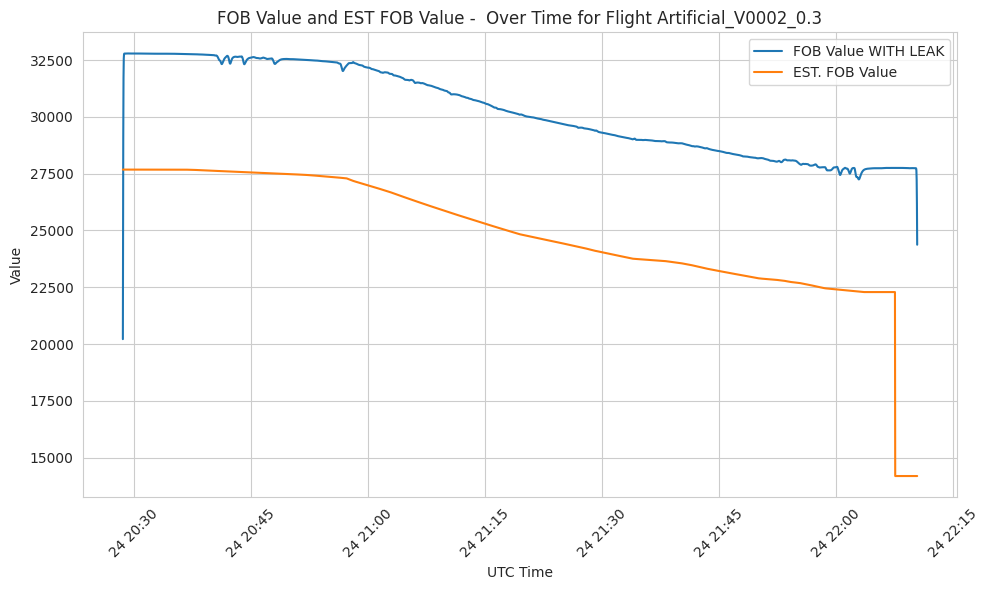

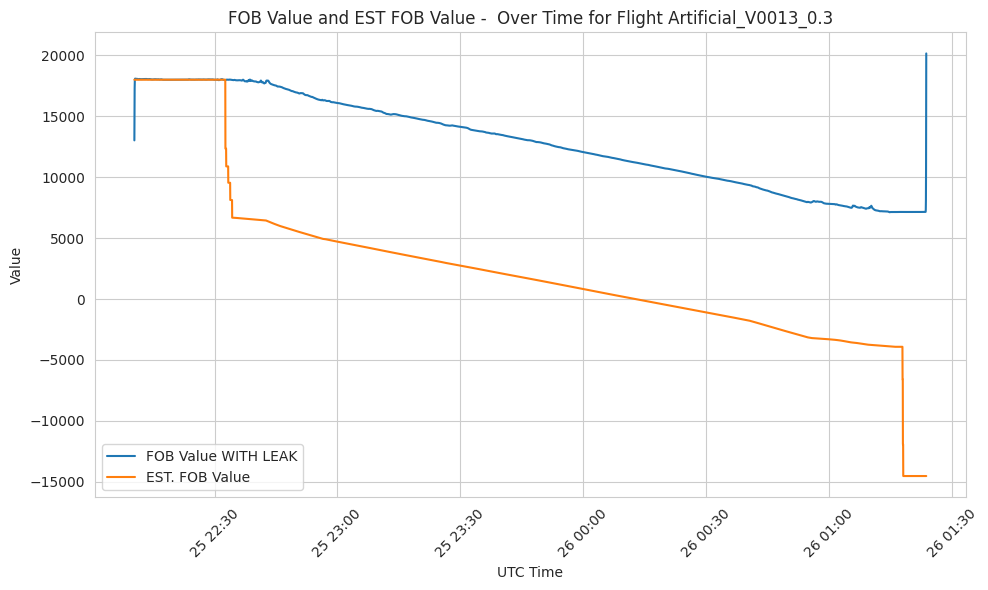

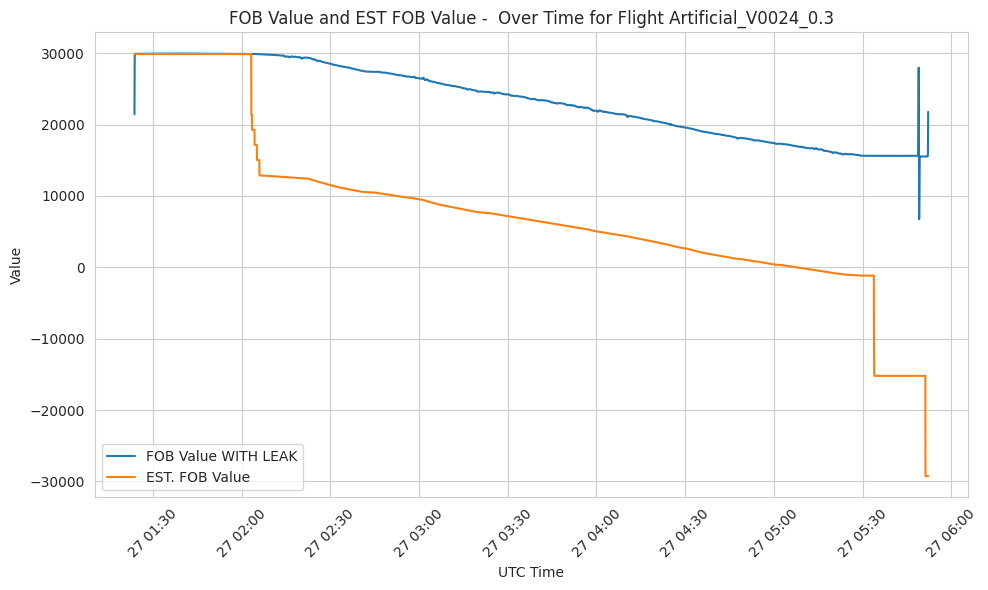

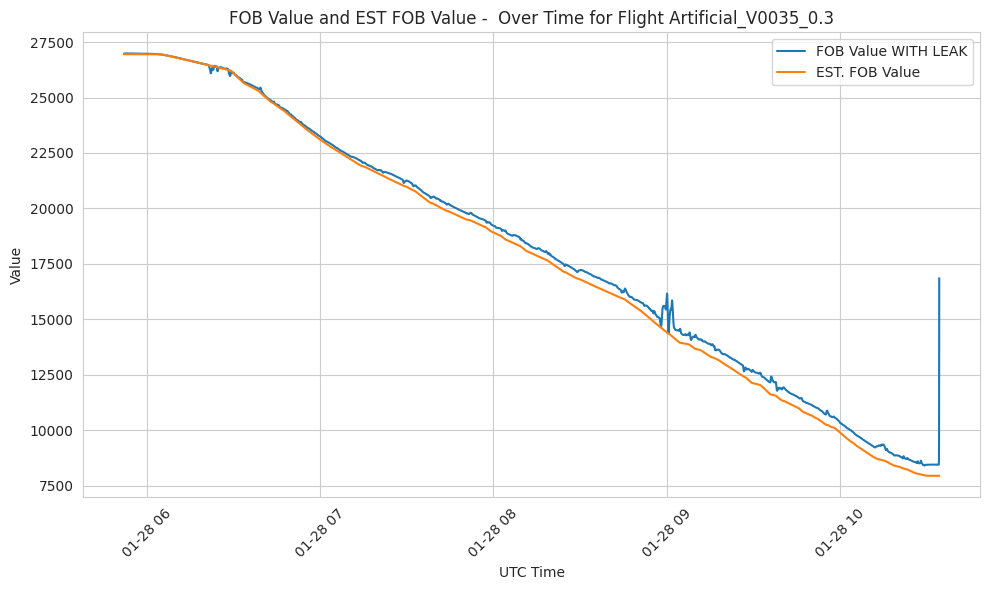

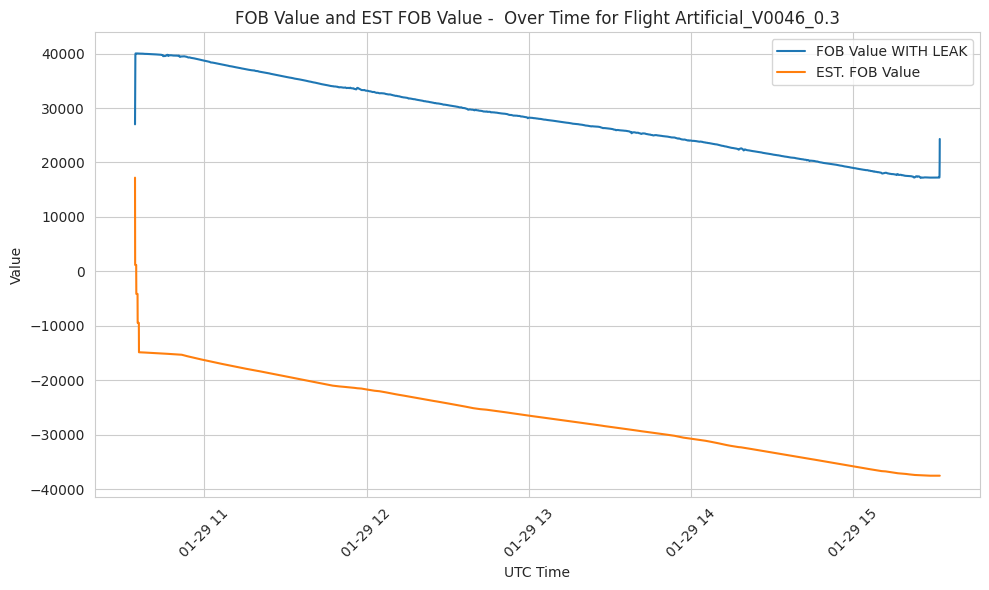

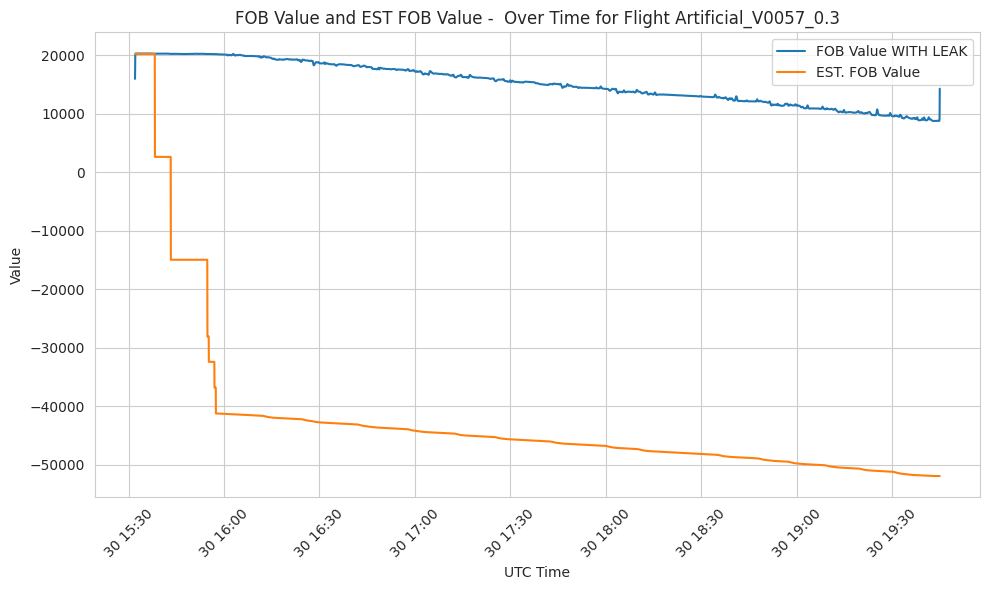

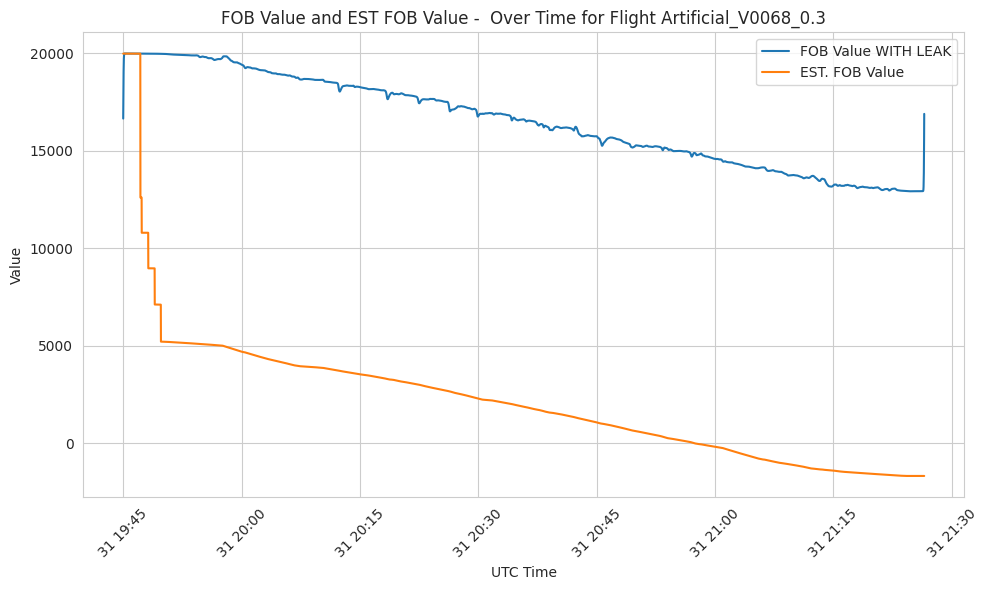

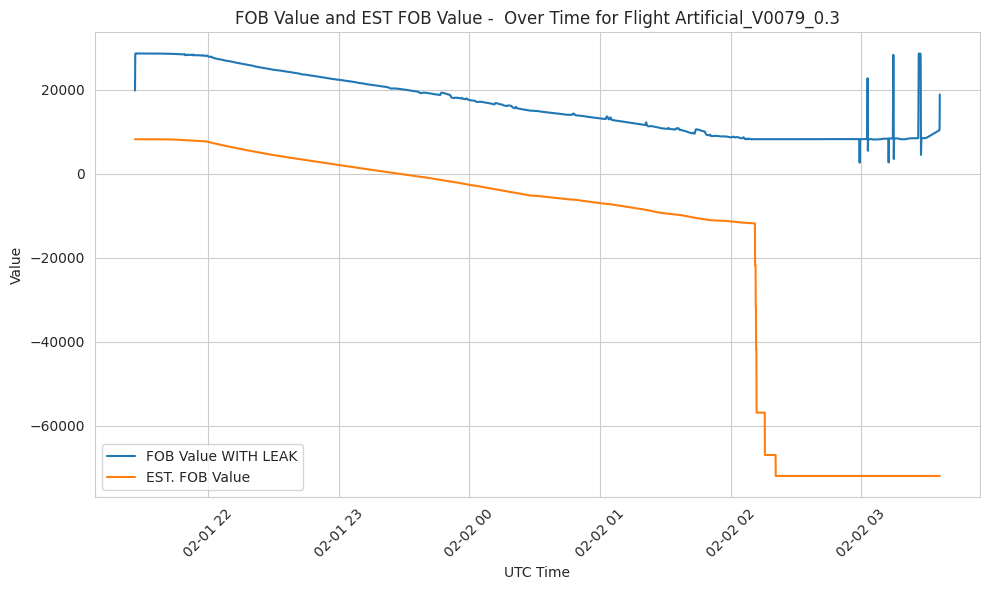

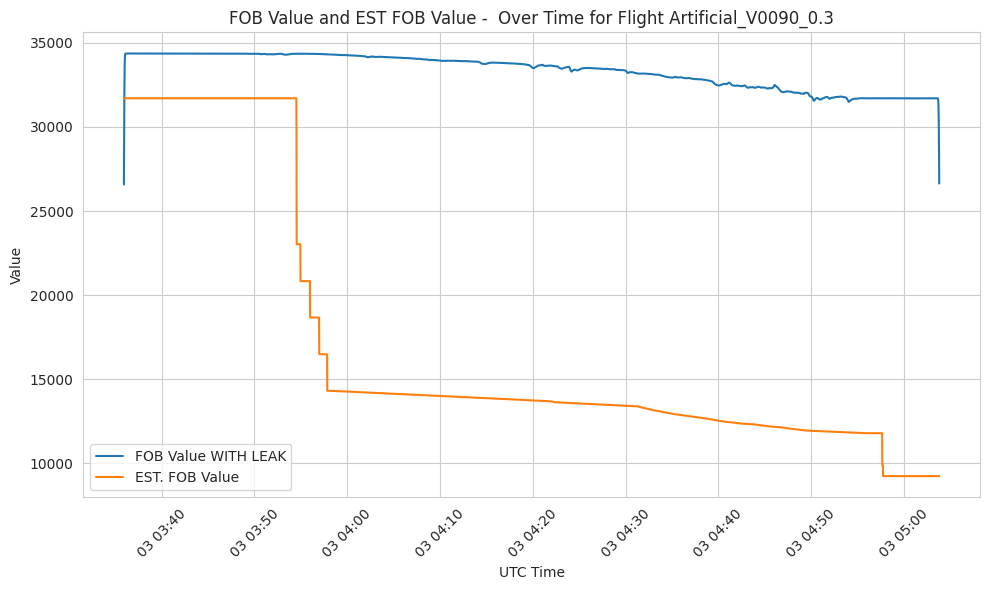

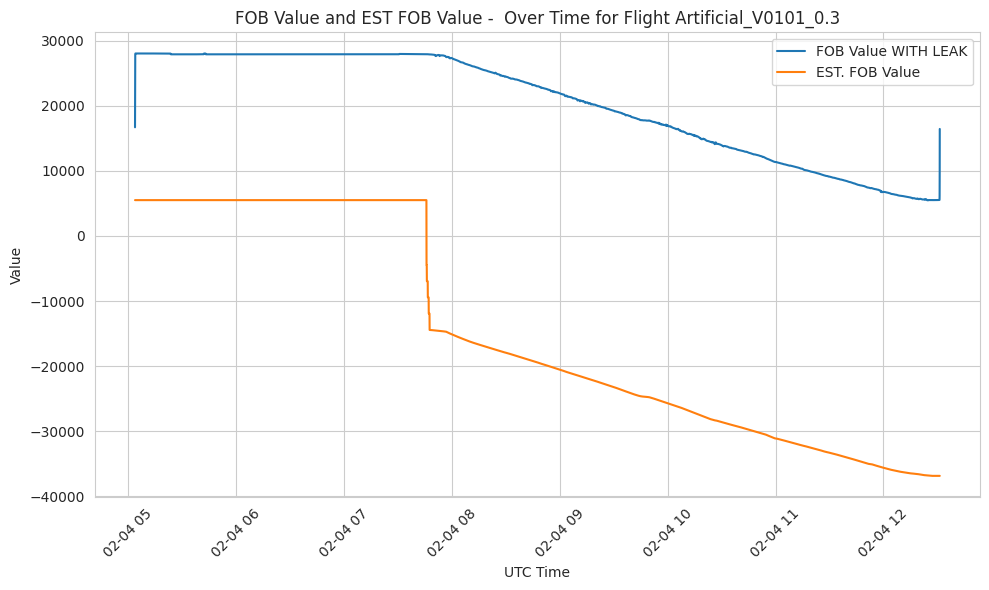

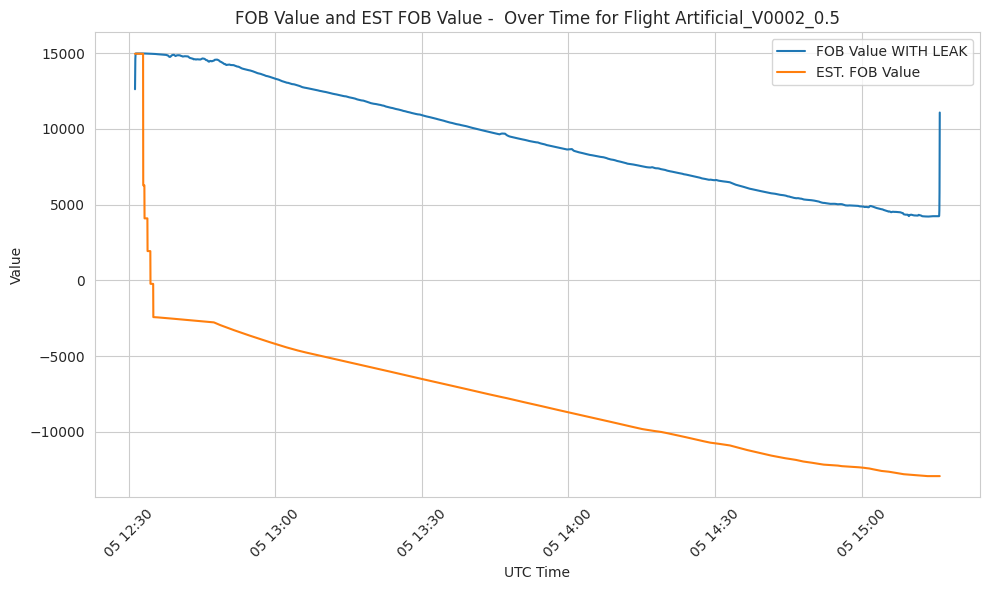

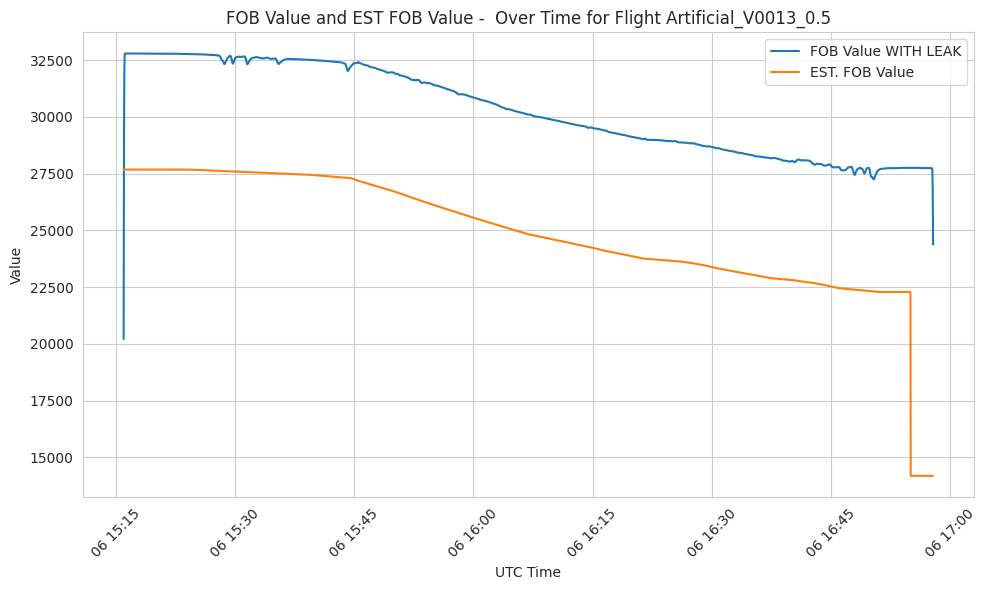

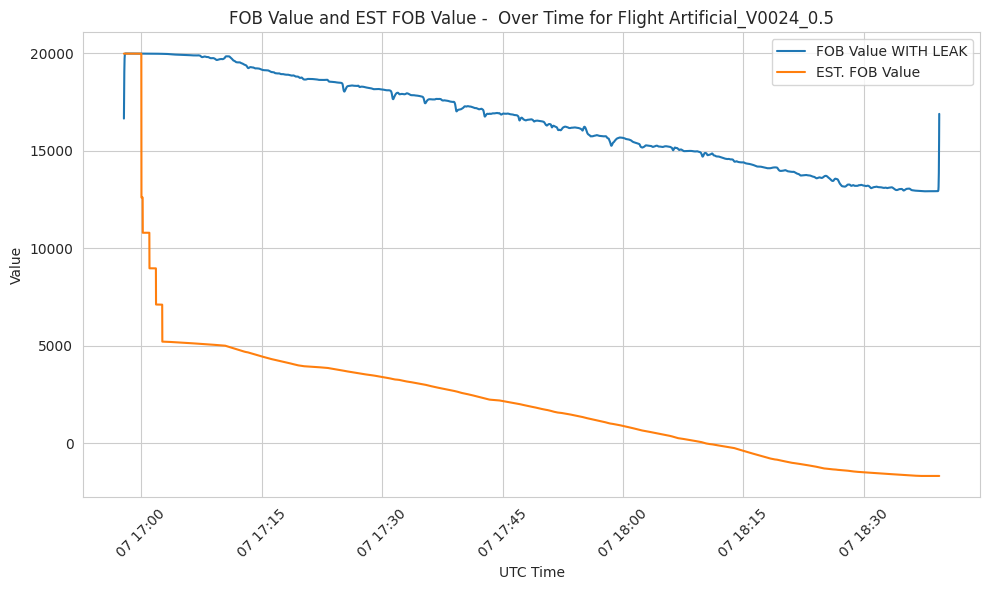

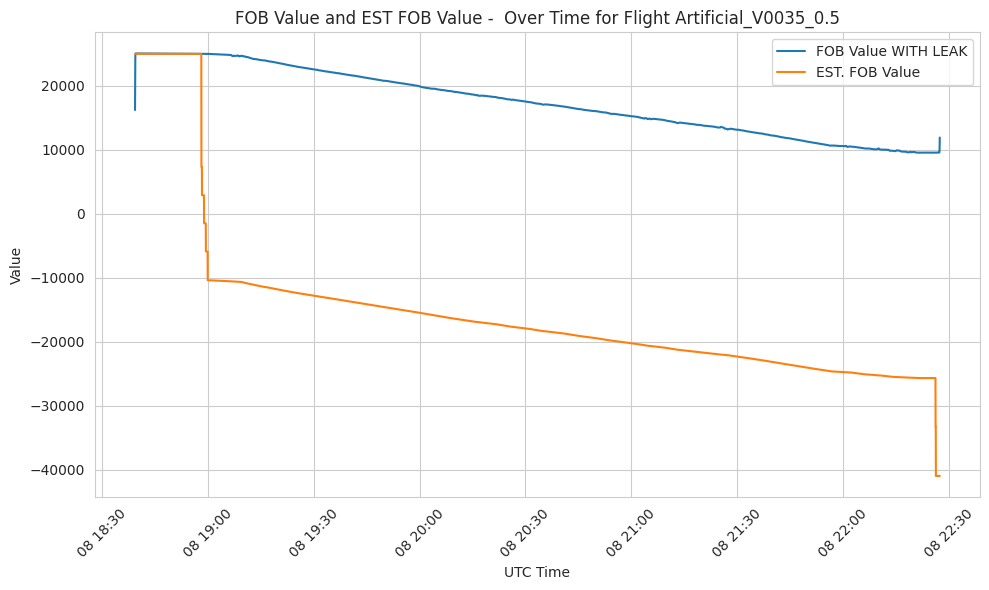

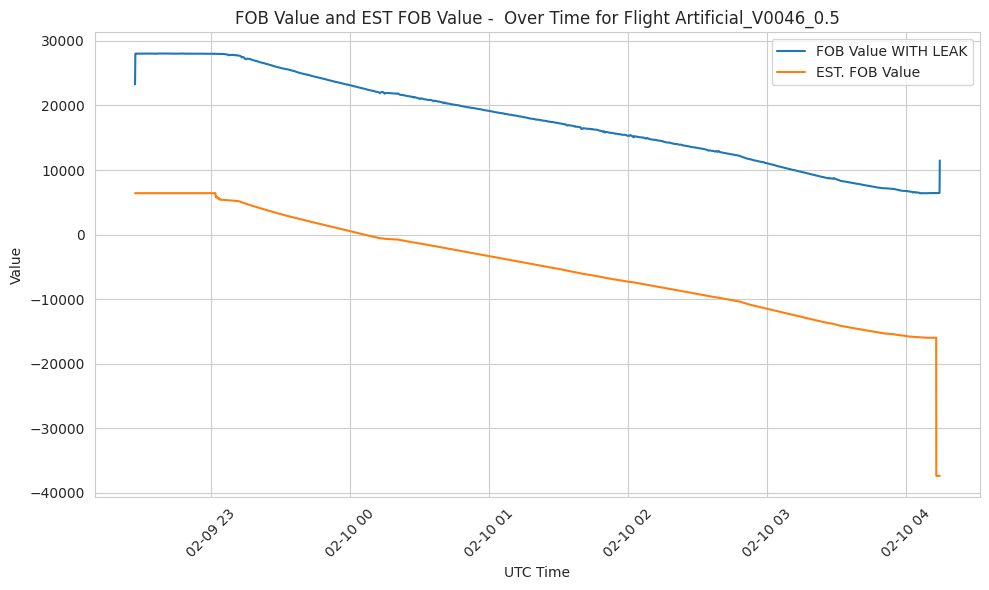

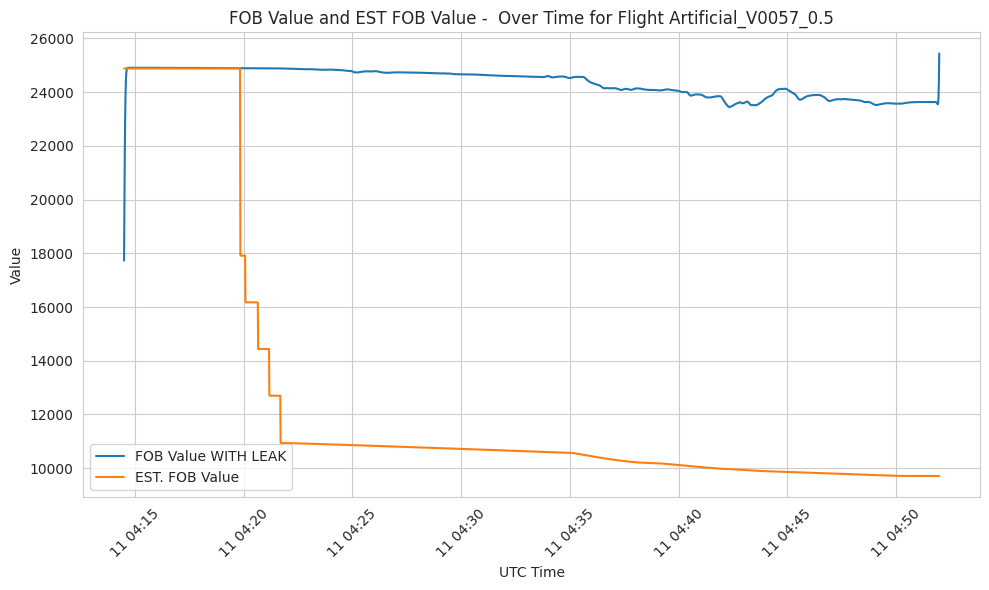

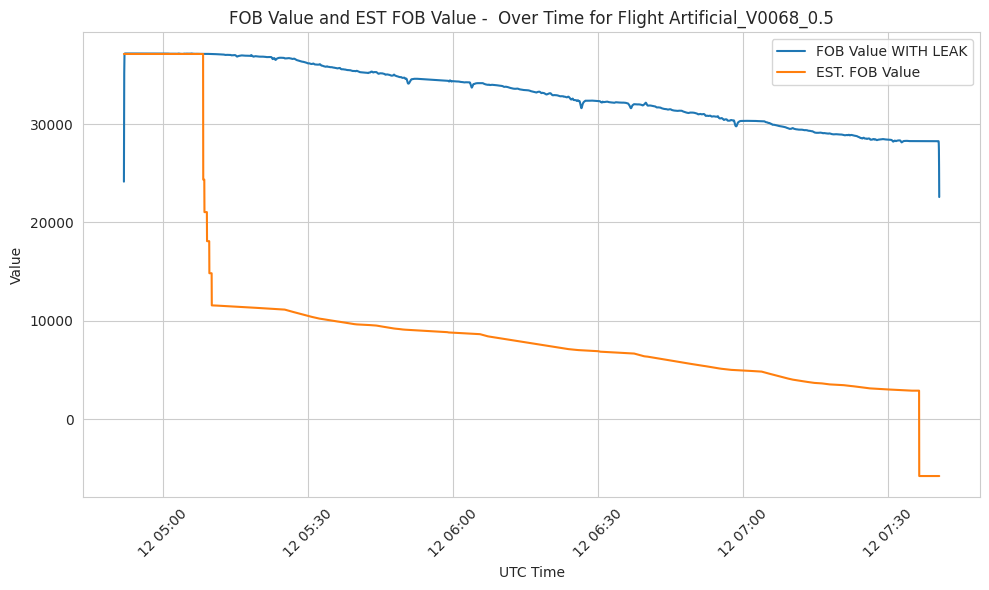

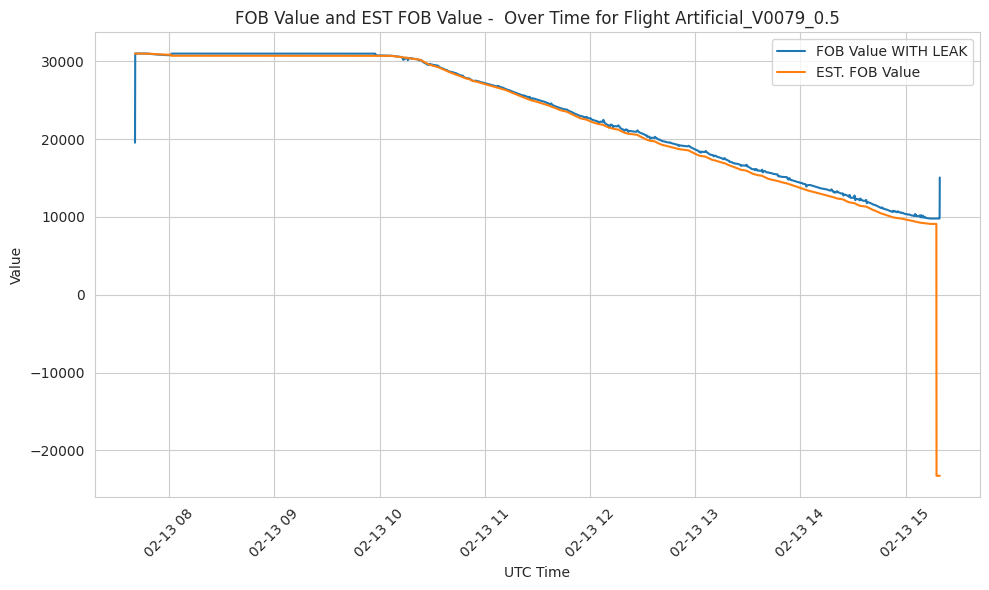

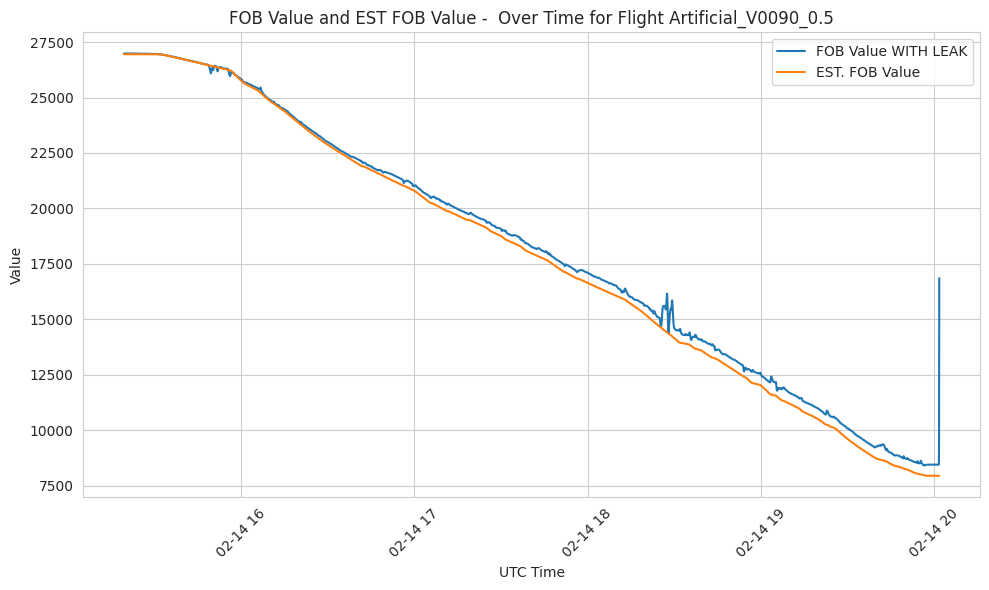

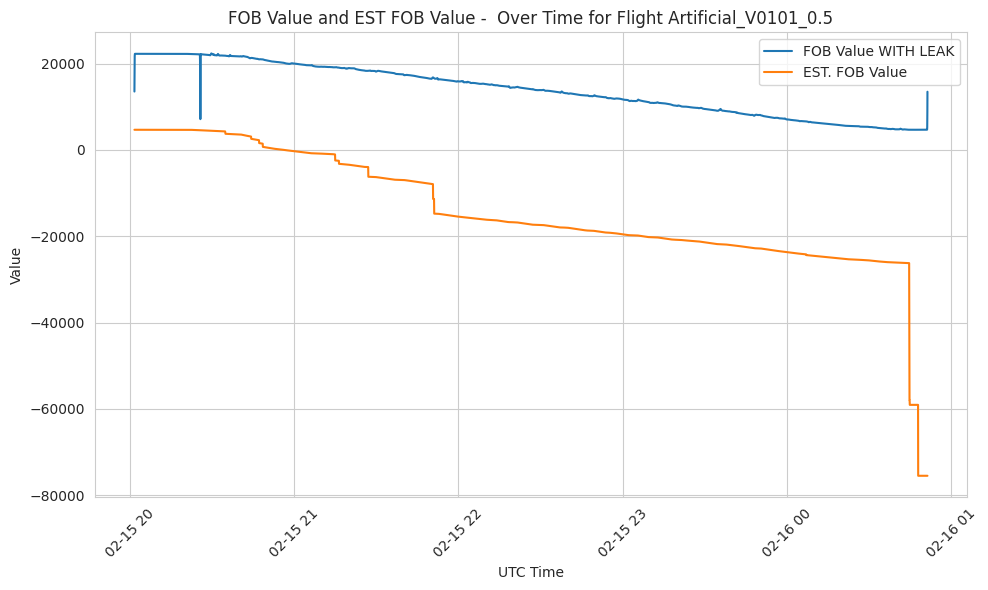

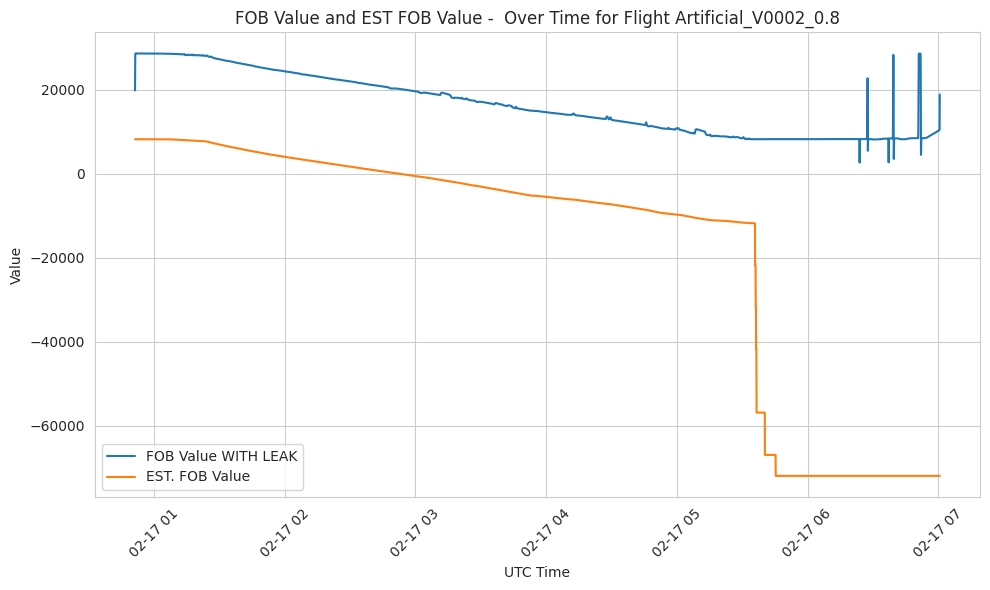

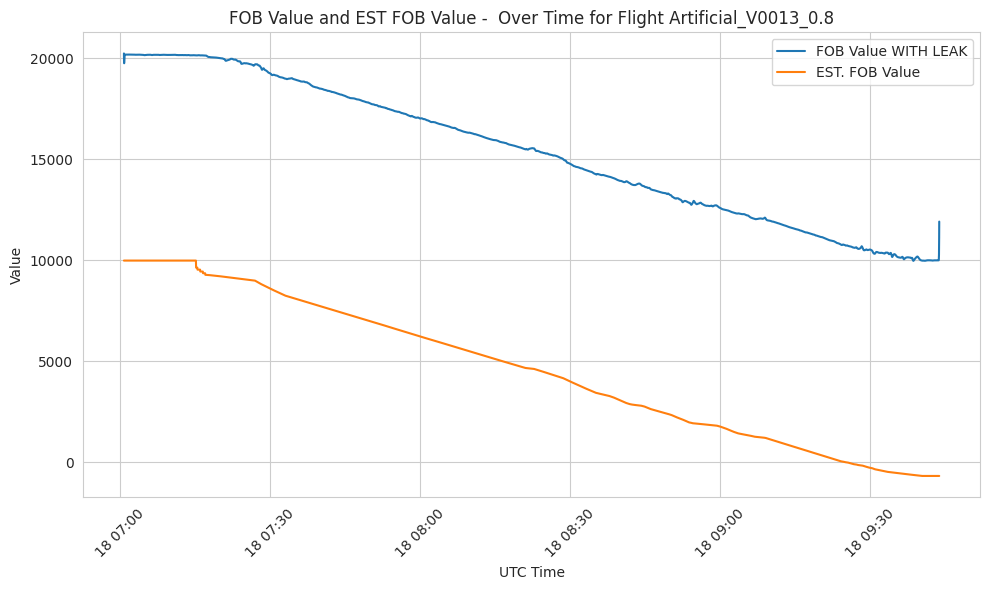

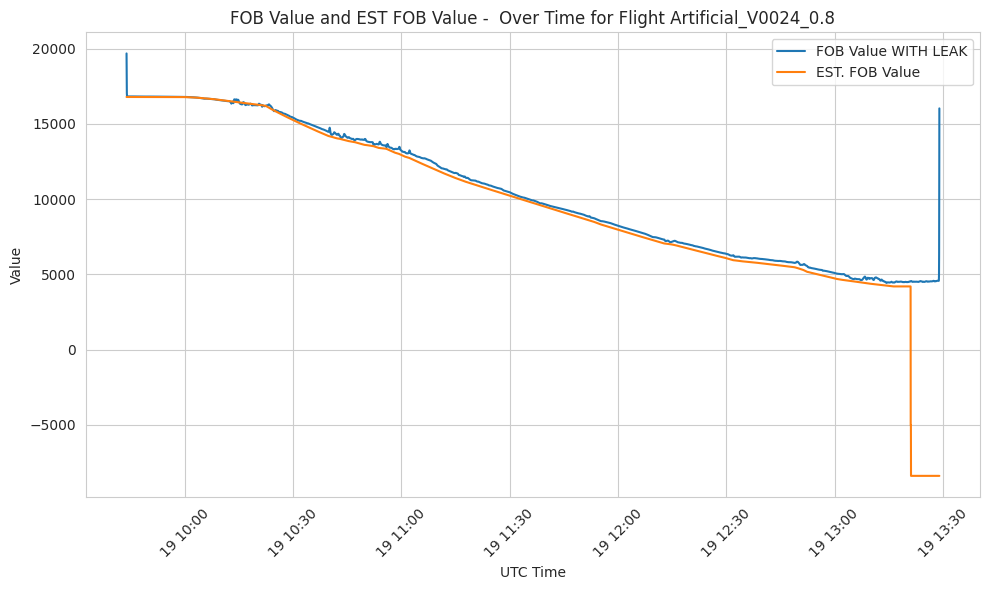

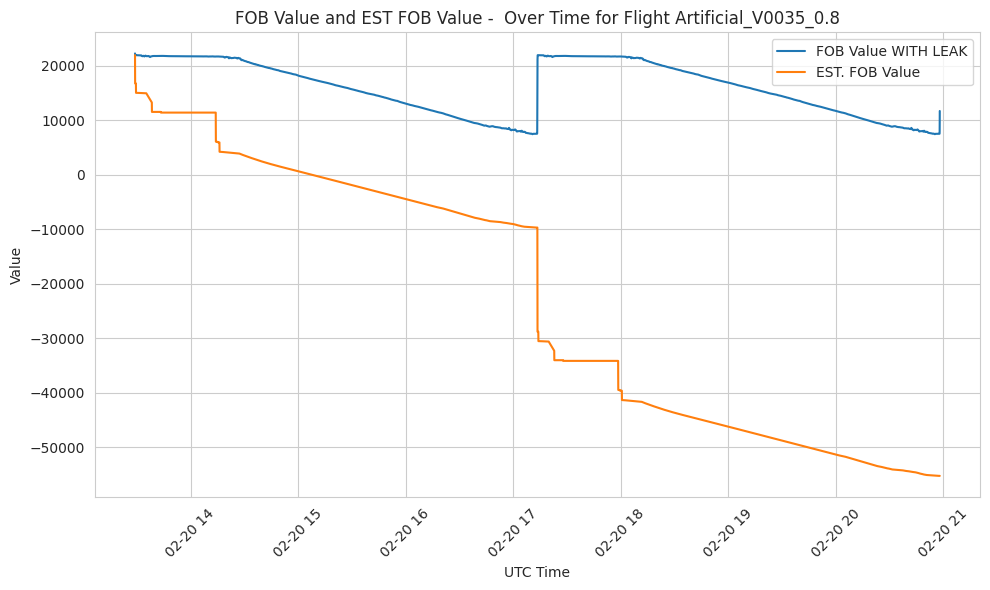

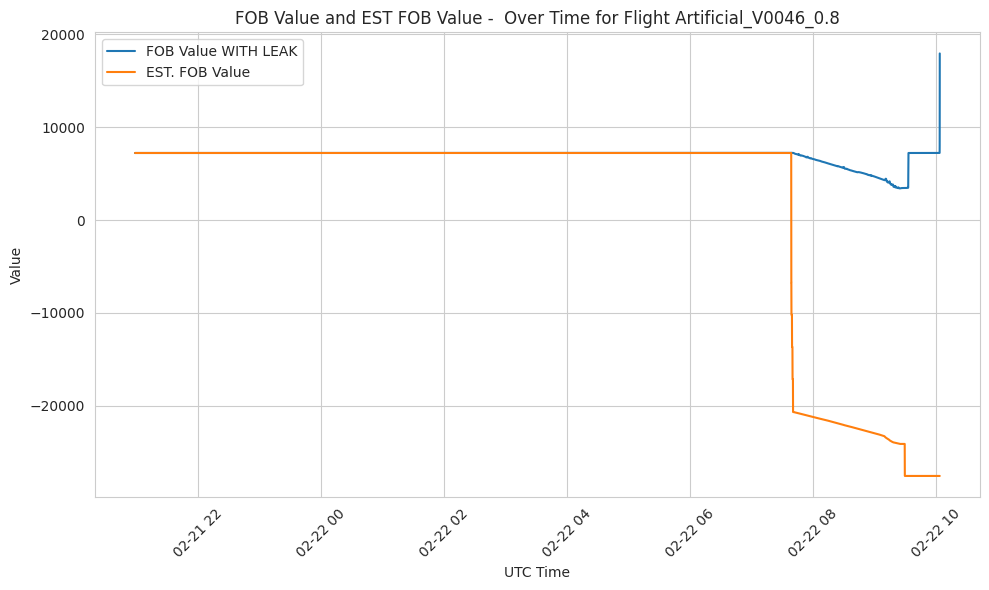

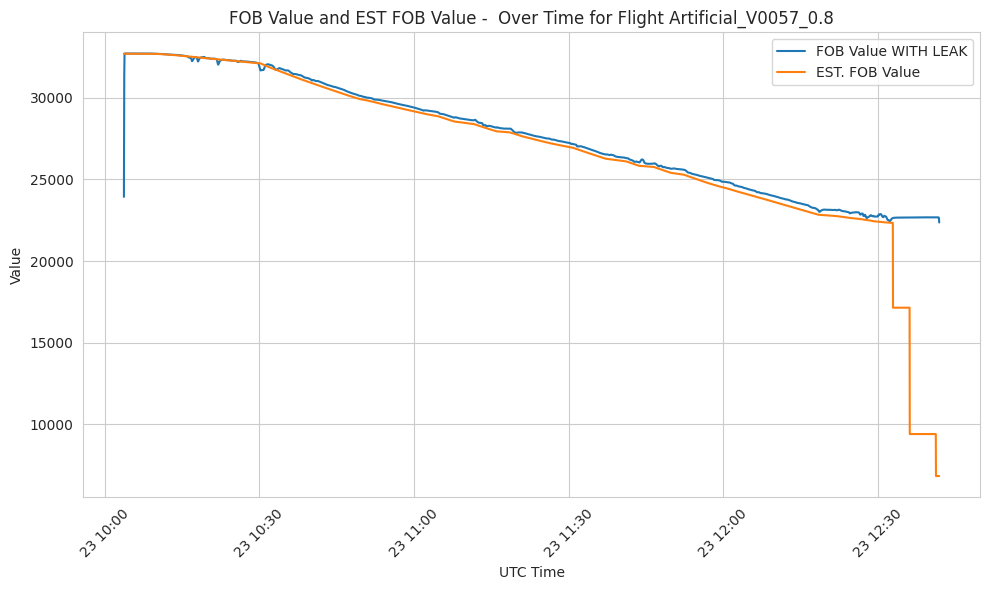

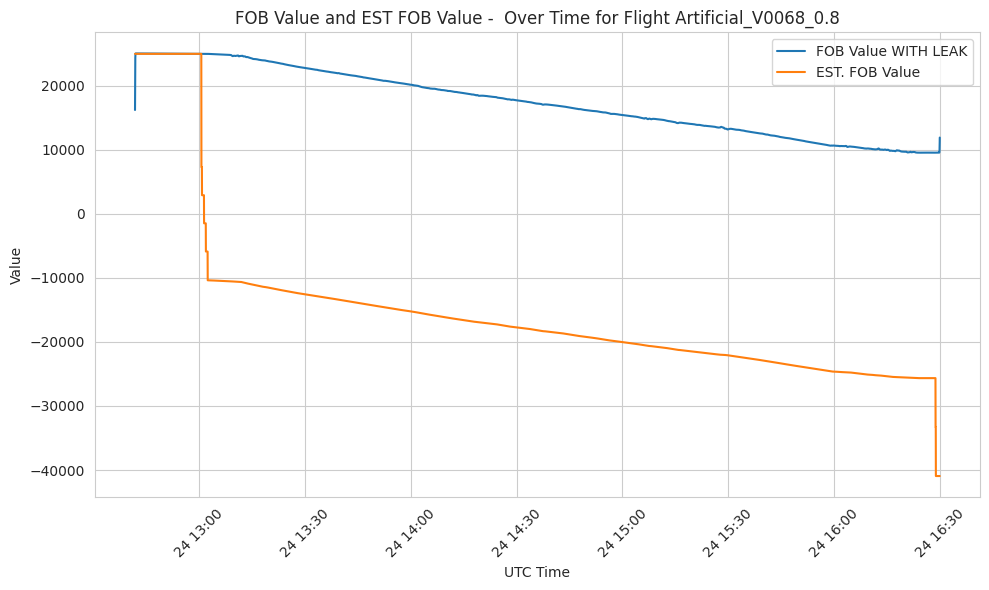

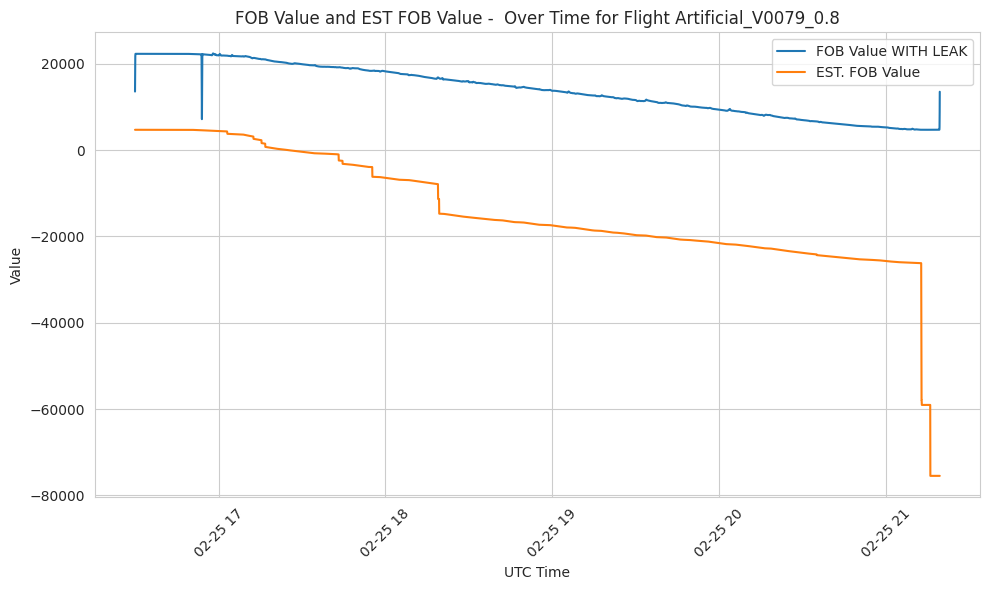

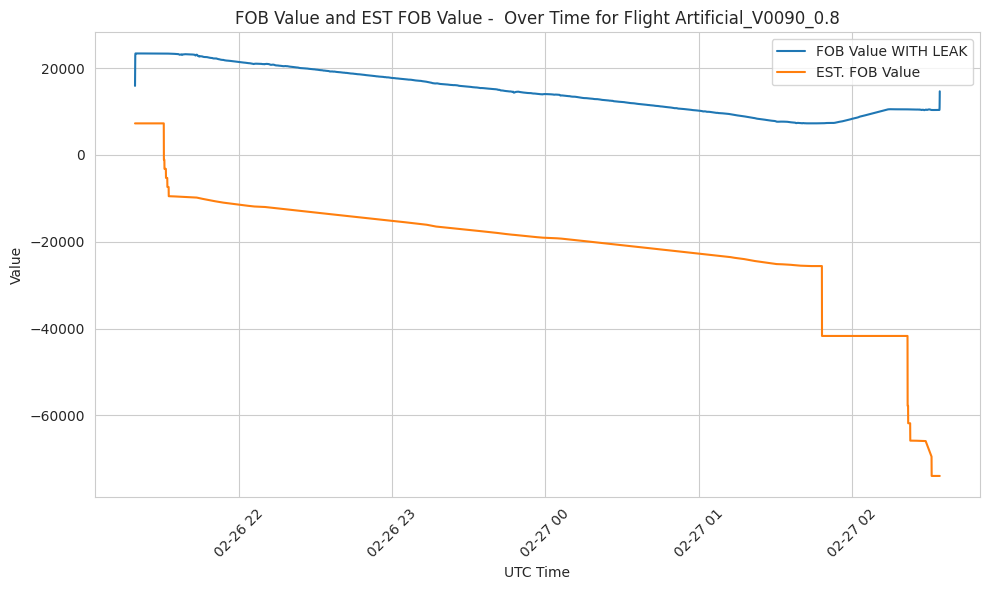

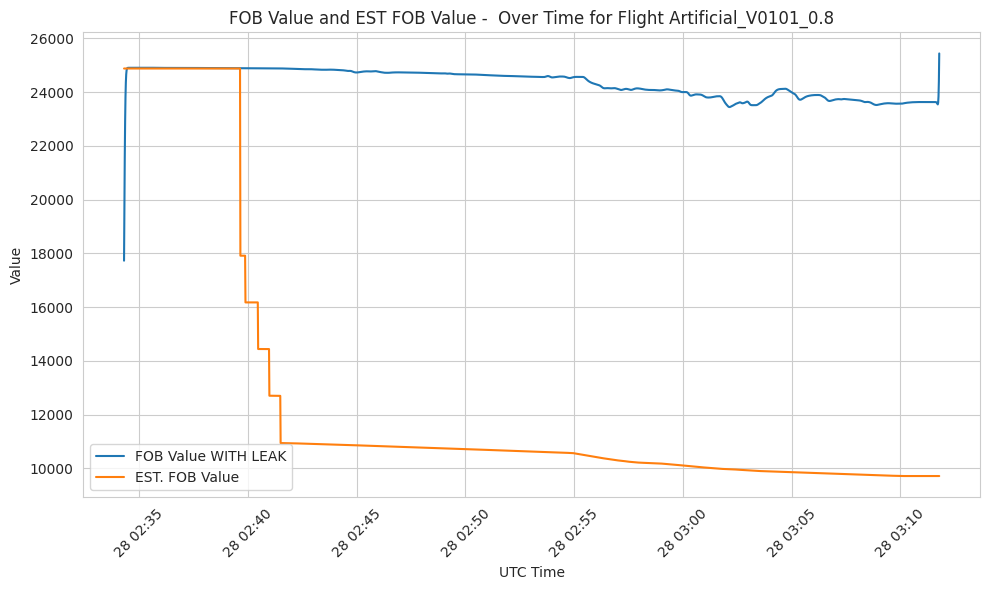

In [174]:
for element in list(new_flights_df["Flight"].unique()):
  import matplotlib.pyplot as plt
  relation_FOB_FUSED = new_flights_df[new_flights_df["Flight"] == element]# & (msn10["FLIGHT_PHASE_COUNT"] == 8)]
  # Plotting
  plt.figure(figsize=(10, 6))
  #plt.plot(relation_FOB_FUSED['UTC_TIME'], relation_FOB_FUSED['VALUE_FOB'], label='FOB Value')
  plt.plot(relation_FOB_FUSED['UTC_TIME'], relation_FOB_FUSED['Value_FOB_with_leak'], label='FOB Value WITH LEAK')
  #plt.plot(relation_FOB_FUSED['UTC_TIME'], relation_FOB_FUSED['FUEL_USED_TOTAL_cumulative'], label="ToTal used fuel")
  plt.plot(relation_FOB_FUSED['UTC_TIME'], relation_FOB_FUSED['FOB_EST'], label='EST. FOB Value')
  #plt.plot(relation_FOB_FUSED['UTC_TIME'], relation_FOB_FUSED['FUEL_USED_TOTAL'], label='Fuel used total')
  plt.xlabel('UTC Time')
  plt.ylabel('Value')
  plt.title(f'FOB Value and EST FOB Value -  Over Time for Flight {element}')
  plt.legend()
  plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
  plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
  plt.show()

In [148]:
# Assuming new_flights_df is the DataFrame containing the new flights with the leakage applied

# Let's check the leakage points and the values after leakage has been applied
for rate in leakage_rates:
    affected_flights = new_flights_df[new_flights_df['Flight'].str.contains(f"_{rate}")]
    for flight in affected_flights['Flight'].unique():
        print(f"Leakage for flight {flight} with rate {rate}:")
        flight_data = affected_flights[affected_flights['Flight'] == flight]
        leakage_points = flight_data[flight_data['Value_FOB_with_leak'] < flight_data['VALUE_FOB']]
        if not leakage_points.empty:
            print(leakage_points[['UTC_TIME', 'VALUE_FOB', 'Value_FOB_with_leak']].head())
        else:
            print("No leakage points found or leakage not applied correctly.")


Leakage for flight Artificial_V0002_0.3 with rate 0.3:
                  UTC_TIME  VALUE_FOB  Value_FOB_with_leak
178192 2017-01-24 20:28:47    15166.0         15165.979349
178193 2017-01-24 20:28:48    15166.0         15165.974174
178194 2017-01-24 20:28:49    15166.0         15165.974012
178195 2017-01-24 20:28:50    15166.0         15165.978488
178196 2017-01-24 20:28:51    15166.0         15165.984838
Leakage for flight Artificial_V0013_0.3 with rate 0.3:
                  UTC_TIME  VALUE_FOB  Value_FOB_with_leak
475044 2017-01-25 22:52:57    18574.0         18436.238112
475046 2017-01-25 22:52:59    26088.0         21693.574365
475047 2017-01-25 22:53:00    26088.0         23094.730911
475048 2017-01-25 22:53:01    26089.0         24203.892069
475049 2017-01-25 22:53:02    26089.0         24997.389116
Leakage for flight Artificial_V0024_0.3 with rate 0.3:
                 UTC_TIME  VALUE_FOB  Value_FOB_with_leak
74483 2017-01-27 02:27:28    28015.0         19265.804255
74484 2017-

In [144]:
# Calculate LEAKAGE by subtracting VALUE_FOB from FOB_EST
new_flights_df["LEAKAGE"] =new_flights_df["FOB_EST"] - new_flights_df["Value_FOB_with_leak"]

## Inspect

In [146]:
# Sum of LEAKAGE per flight
leakage_sum_per_flight = new_flights_df.groupby('Flight')['LEAKAGE'].sum().reset_index(name='LEAKAGE_sum')
leakage_sum_per_flight

Flight   LEAKAGE_sum
0   Artificial_V0002_0.3 -1.687520e+08
1   Artificial_V0002_0.5 -4.694092e+08
2   Artificial_V0002_0.8 -1.690789e+08
3   Artificial_V0013_0.3 -1.013765e+08
4   Artificial_V0013_0.5 -7.981591e+08
5   Artificial_V0013_0.8 -7.586506e+08
6   Artificial_V0024_0.3 -9.438930e+08
7   Artificial_V0024_0.5 -2.052646e+08
8   Artificial_V0024_0.8 -6.487070e+08
9   Artificial_V0035_0.3 -3.321045e+07
10  Artificial_V0035_0.5 -4.859179e+08
11  Artificial_V0035_0.8 -5.895905e+08
12  Artificial_V0046_0.3 -1.097547e+08
13  Artificial_V0046_0.5 -2.638496e+07
14  Artificial_V0046_0.8 -9.438930e+08
15  Artificial_V0057_0.3 -7.981591e+08
16  Artificial_V0057_0.5 -8.712204e+07
17  Artificial_V0057_0.8 -9.247307e+07
18  Artificial_V0068_0.3 -2.444814e+08
19  Artificial_V0068_0.5 -1.189305e+08
20  Artificial_V0068_0.8 -1.398293e+07
21  Artificial_V0079_0.3 -2.456441e+08
22  Artificial_V0079_0.5 -7.491983e+08
23  Artificial_V0079_0.8 -7.586752e+06
24  Artificial_V0090_0.3 -8.737604e+08
25  Artificial_V0090_0.5 -8.737604e+08
26  Artificial_V0090_0.8 -1.052482e+08
27  Artificial_V0101_0.3 -6.800442e+08
28  Artificial_V0101_0.5 -5.056065e+08
29  Artificial_V0101_0.8 -1.393685e+07

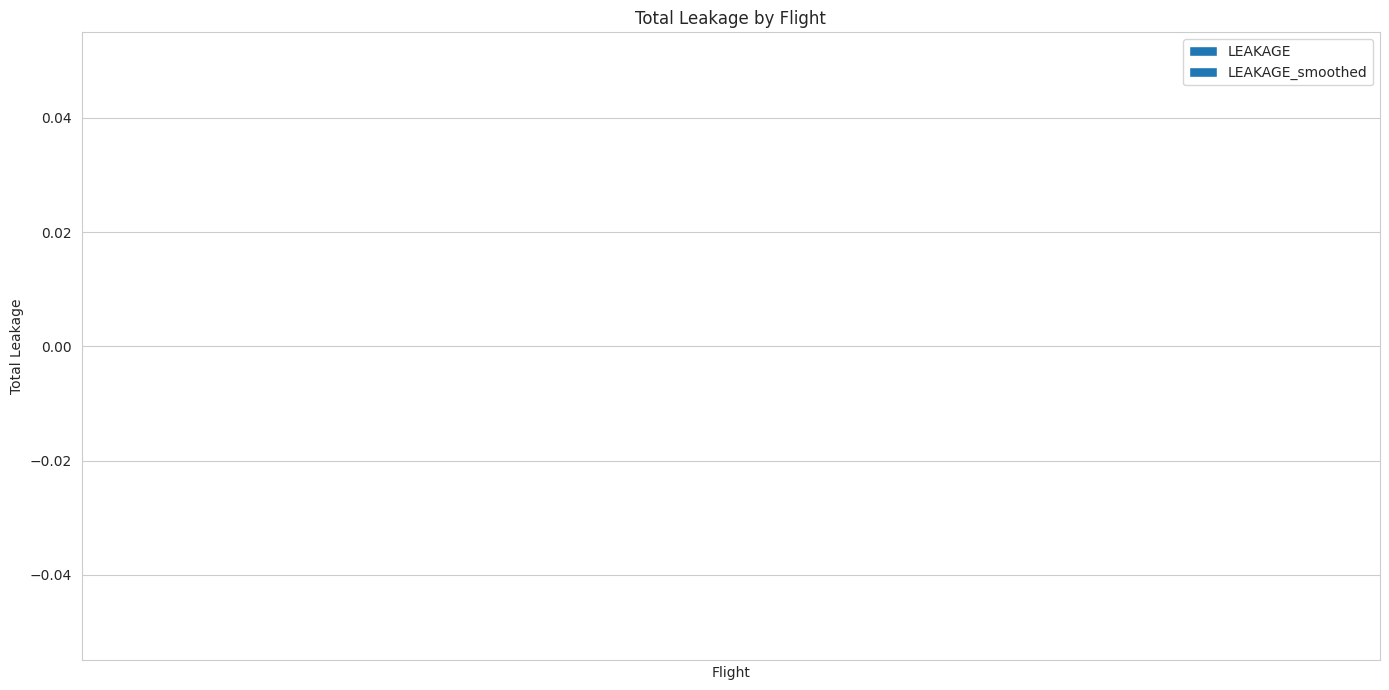

In [147]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming leakage_sum_per_flight and leakage_smoothed_sum_per_flight are correctly defined

# Merge the two DataFrames for easier plotting
merged_leakage = leakage_sum_per_flight.merge(leakage_smoothed_sum_per_flight, on='Flight', suffixes=('', '_smoothed'))

# Set up the plot
plt.figure(figsize=(14, 7))

# Number of flights
n_flights = len(merged_leakage['Flight'])
# The x location for the groups
ind = np.arange(n_flights)
# The width of the bars
width = 0.35

# Plotting LEAKAGE
plt.bar(ind - width/2, merged_leakage['LEAKAGE_sum'], width, label='LEAKAGE')

# Plotting LEAKAGE_smoothed
plt.bar(ind + width/2, merged_leakage['LEAKAGE_smoothed_sum'], width, label='LEAKAGE_smoothed')

# Add some text for labels, title, and custom x-axis tick labels, etc.
plt.xlabel('Flight')
plt.ylabel('Total Leakage')
plt.title('Total Leakage by Flight')

# Custom x-axis tick labels
plt.xticks(ind, merged_leakage['Flight'], rotation='vertical')

plt.legend()

plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels

plt.show()

In [66]:
# Optionally, save the new flights DataFrame to a file
new_flights_df.to_csv('/content/drive/My Drive/IE/CORPORATE_PROJECT_AIRBUS/01_DATA/simulated_flights_with_leakages.csv', index=False)

# INSPECT LEAKAGE

In [22]:
# Calculate mean LEAKAGE and LEAKAGE_smoothed per flight
leakage_stats = msn02.groupby('Flight').agg({
    'LEAKAGE': ['mean', 'sum', 'median'],
    'LEAKAGE_smoothed': ['mean', 'sum', 'median']
}).reset_index()

print(leakage_stats)


   Flight       LEAKAGE                             LEAKAGE_smoothed  \
                   mean           sum        median             mean   
0   V0094 -13491.586131 -1.774818e+08 -12906.818000     -5917.245601   
1   V0095 -26021.889094 -5.056053e+08 -25777.975340    -21130.754422   
2   V0097 -33798.740894 -7.491829e+08 -20300.516420    -22189.113844   
3   V0098   -927.712782 -1.397599e+07    120.724000     -7147.770879   
4   V0099 -27965.680051 -4.859037e+08 -30888.680520    -19109.105148   
5   V0132  -5440.114728 -3.324998e+07  -5256.912250    -12897.367226   
6   V0133 -17151.657816 -2.456632e+08 -17002.775000    -13219.703796   
7   V0134   -802.149962 -7.611601e+06   -234.386100     -9561.535778   
8   V0135   -506.690919 -1.395376e+07   -275.299960    -11947.553117   
9   V0136   -308.566309 -5.225262e+06   -328.133500      -283.914319   
10  V0137 -21075.013906 -5.895946e+08 -21045.093640    -12844.755489   
11  V0138  -7876.938957 -1.013841e+08  -7631.119110     -8014.10

In [23]:
# Sum of LEAKAGE per flight
leakage_sum_per_flight = msn02.groupby('Flight')['LEAKAGE'].sum().reset_index(name='LEAKAGE_sum')

# Sum of LEAKAGE_smoothed per flight
leakage_smoothed_sum_per_flight = msn02.groupby('Flight')['LEAKAGE_smoothed'].sum().reset_index(name='LEAKAGE_smoothed_sum')


In [278]:
leakage_sum_per_flight

Flight   LEAKAGE_sum
0   Artificial_V0002_0.3 -1.687520e+08
1   Artificial_V0002_0.5 -4.694092e+08
2   Artificial_V0002_0.8 -1.690789e+08
3   Artificial_V0013_0.3 -1.013765e+08
4   Artificial_V0013_0.5 -7.981591e+08
5   Artificial_V0013_0.8 -7.586506e+08
6   Artificial_V0024_0.3 -9.438930e+08
7   Artificial_V0024_0.5 -2.052646e+08
8   Artificial_V0024_0.8 -6.487070e+08
9   Artificial_V0035_0.3 -3.321045e+07
10  Artificial_V0035_0.5 -4.859179e+08
11  Artificial_V0035_0.8 -5.895905e+08
12  Artificial_V0046_0.3 -1.097547e+08
13  Artificial_V0046_0.5 -2.638496e+07
14  Artificial_V0046_0.8 -9.438930e+08
15  Artificial_V0057_0.3 -7.981591e+08
16  Artificial_V0057_0.5 -8.712204e+07
17  Artificial_V0057_0.8 -9.247307e+07
18  Artificial_V0068_0.3 -2.444814e+08
19  Artificial_V0068_0.5 -1.189305e+08
20  Artificial_V0068_0.8 -1.398293e+07
21  Artificial_V0079_0.3 -2.456441e+08
22  Artificial_V0079_0.5 -7.491983e+08
23  Artificial_V0079_0.8 -7.586752e+06
24  Artificial_V0090_0.3 -8.737604e+08
25  Artificial_V0090_0.5 -8.737604e+08
26  Artificial_V0090_0.8 -1.052482e+08
27  Artificial_V0101_0.3 -6.800442e+08
28  Artificial_V0101_0.5 -5.056065e+08
29  Artificial_V0101_0.8 -1.393685e+07

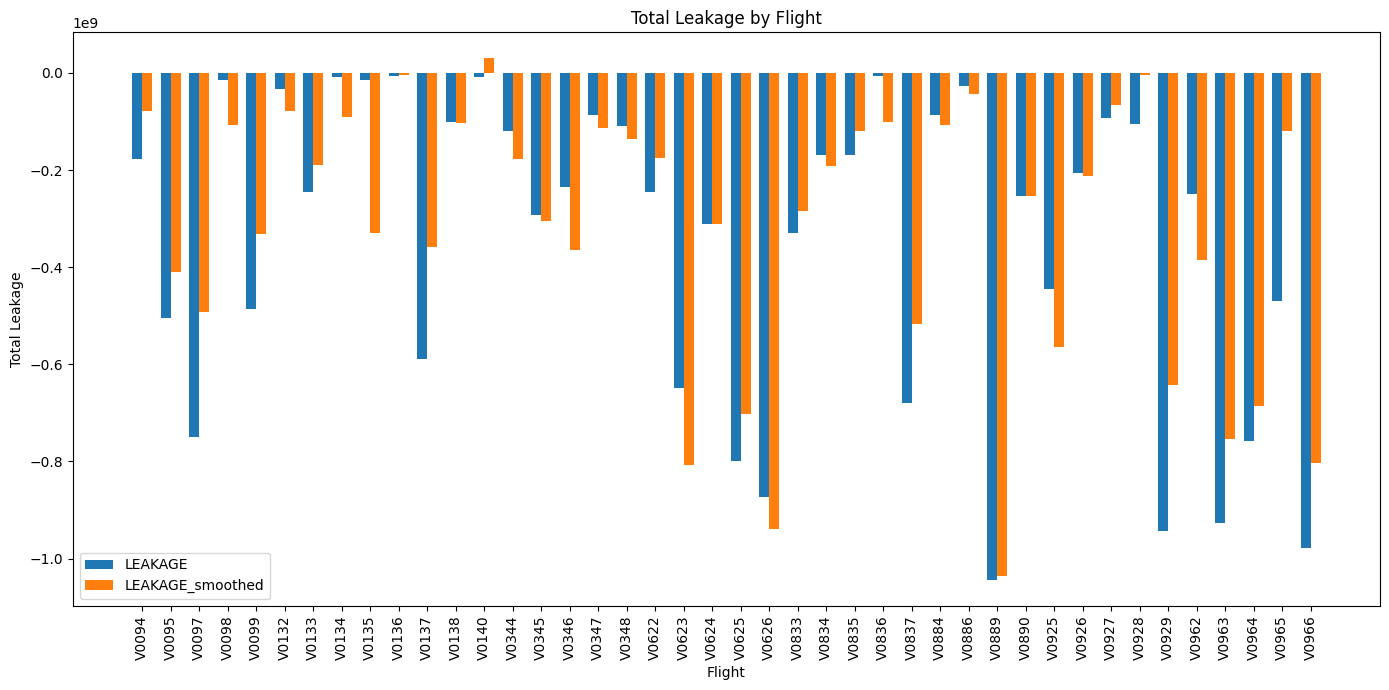

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming leakage_sum_per_flight and leakage_smoothed_sum_per_flight are correctly defined

# Merge the two DataFrames for easier plotting
merged_leakage = leakage_sum_per_flight.merge(leakage_smoothed_sum_per_flight, on='Flight', suffixes=('', '_smoothed'))

# Set up the plot
plt.figure(figsize=(14, 7))

# Number of flights
n_flights = len(merged_leakage['Flight'])
# The x location for the groups
ind = np.arange(n_flights)
# The width of the bars
width = 0.35

# Plotting LEAKAGE
plt.bar(ind - width/2, merged_leakage['LEAKAGE_sum'], width, label='LEAKAGE')

# Plotting LEAKAGE_smoothed
plt.bar(ind + width/2, merged_leakage['LEAKAGE_smoothed_sum'], width, label='LEAKAGE_smoothed')

# Add some text for labels, title, and custom x-axis tick labels, etc.
plt.xlabel('Flight')
plt.ylabel('Total Leakage')
plt.title('Total Leakage by Flight')

# Custom x-axis tick labels
plt.xticks(ind, merged_leakage['Flight'], rotation='vertical')

plt.legend()

plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels

plt.show()


In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting seaborn style for better aesthetics
sns.set_style("whitegrid")

# Get a list of unique flights
flights = msn02['Flight'].unique()

# Create a plot for each flight
for flight in flights:
    # Filter the DataFrame for the current flight
    df_flight = msn02[msn02['Flight'] == flight]

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(df_flight['UTC_TIME'], df_flight['VALUE_FOB'], label='VALUE_FOB', color='blue', marker='o', linestyle='-', markersize=5)
    plt.plot(df_flight['UTC_TIME'], df_flight['FUEL_USED_TOTAL_cumulative'], label='FUEL_USED_TOTAL_cumulative', color='red', marker='x', linestyle='-', markersize=5)

    plt.title(f'Flight {flight}: VALUE_FOB vs FUEL_USED_TOTAL_cumulative Over Time')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()  # Adjust the padding between and around subplots.

    # Show plot
    plt.show()


Output hidden; open in https://colab.research.google.com to view.

In [26]:
# Summarize existing flights
flight_summary = msn02.groupby('Flight').agg({
    'VALUE_FOB': ['first', 'last'],
    'FUEL_USED_TOTAL_cumulative': 'last',
    'LEAKAGE': 'sum',
    'LEAKAGE_smoothed': 'sum',

}).reset_index()

flight_summary.columns = ['Flight', 'VALUE_FOB_start', 'VALUE_FOB_end', "FUEL_USED_TOTAL_cumulative", 'LEAKAGE_sum', 'LEAKAGE_smoothed_sum']
print(flight_summary)



   Flight  VALUE_FOB_start  VALUE_FOB_end  FUEL_USED_TOTAL_cumulative  \
0   V0094           5328.0         5355.0                50832.998000   
1   V0095          15552.0        15574.0                71508.925440   
2   V0097           8204.0        10386.0                80102.172000   
3   V0098          29921.0        12466.0                51228.138000   
4   V0099           4683.0         4683.0                80151.668300   
5   V0132          27680.0        27746.0                13489.825000   
6   V0133          16027.0        15984.0                30205.835000   
7   V0134          32694.0        22677.0                25848.822000   
8   V0135          30988.0         9797.0                54240.836960   
9   V0136          26953.0         8446.0                19005.712000   
10  V0137           7489.0         7505.0                42170.058620   
11  V0138          18574.0        18579.0                15417.113110   
12  V0140          16790.0         4576.0          

# Create artifical Leakages (SKIP THIS ITS OLD)

In [26]:
msn02.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623579 entries, 0 to 623578
Data columns (total 77 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   UTC_TIME                             623579 non-null  datetime64[ns]
 1   MSN                                  623579 non-null  object        
 2   Flight                               623579 non-null  object        
 3   FLIGHT_PHASE_COUNT                   560658 non-null  float64       
 4   FUEL_FLOW_1                          514937 non-null  float64       
 5   FUEL_FLOW_2                          516594 non-null  float64       
 6   FUEL_FLOW_3                          516599 non-null  float64       
 7   FUEL_FLOW_4                          514711 non-null  float64       
 8   FUEL_PITCH                           560314 non-null  float64       
 9   FUEL_ROLL                            560314 non-null  float64       
 

In [43]:
msn02.columns

Index(['UTC_TIME', 'MSN', 'Flight', 'FLIGHT_PHASE_COUNT', 'FUEL_FLOW_1',
       'FUEL_FLOW_2', 'FUEL_FLOW_3', 'FUEL_FLOW_4', 'FUEL_PITCH', 'FUEL_ROLL',
       'FUEL_TRANSFER_MODE_VALUE', 'FUEL_USED_1', 'FUEL_USED_2', 'FUEL_USED_3',
       'FUEL_USED_4', 'FW_GEO_ALTITUDE', 'LEAK_DETECTION_LEAK_FLOW',
       'LSTU1_A_VOLUME', 'LSTU1_F_VOLUME', 'PITCH_ANGLE', 'ROLL_ANGLE',
       'RSTU1_A_VOLUME', 'RSTU1_F_VOLUME', 'SELECTED_GADIR_ALTITUDE_VALUE',
       'STATUS_FUEL_LEAK_DETECTED_VALID', 'TRANSFER_MODE', 'VALUE_FOB',
       'VALUE_FUEL_QTY_CC1', 'VALUE_FUEL_QTY_CC2', 'VALUE_FUEL_QTY_CC3',
       'VALUE_FUEL_QTY_CC4', 'VALUE_FUEL_QTY_CT', 'VALUE_FUEL_QTY_FT1',
       'VALUE_FUEL_QTY_FT2', 'VALUE_FUEL_QTY_FT3', 'VALUE_FUEL_QTY_FT4',
       'VALUE_FUEL_QTY_LXT', 'VALUE_FUEL_QTY_RXT', 'day', 'month', 'time',
       'year', 'APU_FUEL_FLOW_REQUEST_SIGNAL_1', 'EF1_Density', 'EF4_Density',
       'STATUS_FUEL_QTY_PART_UNUSABLE_LST',
       'STATUS_FUEL_QTY_PART_UNUSABLE_RST', 'STATUS_FUEL_QTY_UN

In [44]:
columns_to_use = ["UTC_TIME","Flight","MSN","FLIGHT_PHASE_COUNT",'VALUE_FOB_smoothed', 'FUEL_USED_TOTAL_smoothed',
       'FOB_change_smoothed',  'FUEL_USED_change_smoothed',
        'FUEL_USED_TOTAL_change_smoothed',
       'Time_diff_seconds',
       'FUEL_USED_TOTAL_cumulative_smoothed',
       'VALUE_FOB_smoothed_first', 'FOB_EST_smoothed',
       'LEAKAGE_smoothed','Time_diff_seconds']
msn02_real_flights = msn02[columns_to_use].copy()

msn02_real_flights.sort_values(['Flight', 'UTC_TIME'], inplace=True)

In [45]:
msn02_real_flights.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 623579 entries, 568607 to 429547
Data columns (total 15 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   UTC_TIME                             623579 non-null  datetime64[ns]
 1   Flight                               623579 non-null  object        
 2   MSN                                  623579 non-null  object        
 3   FLIGHT_PHASE_COUNT                   560658 non-null  float64       
 4   VALUE_FOB_smoothed                   623579 non-null  float64       
 5   FUEL_USED_TOTAL_smoothed             623579 non-null  float64       
 6   FOB_change_smoothed                  623537 non-null  float64       
 7   FUEL_USED_change_smoothed            623537 non-null  float64       
 8   FUEL_USED_TOTAL_change_smoothed      623579 non-null  float64       
 9   Time_diff_seconds                    623579 non-null  float64    

In [46]:
# Calculate the average flight duration
average_flight_duration = (msn02_real_flights['Time_diff_seconds'].sum() / msn02_real_flights['Flight'].nunique()).mean()
print(average_flight_duration)
# Calculate the average initial VALUE_FOB
average_initial_VALUE_FOB = msn02_real_flights['VALUE_FOB_smoothed_first'].mean()
print(average_initial_VALUE_FOB)

14525.309523809523
19068.10580832979


In [47]:
#amount of flights
len(msn02_real_flights["Flight"].unique())

42

In [48]:
# Group by Flight, sum the fuel used, and calculate the duration for each flight
msn02_real_flights_summary= msn02_real_flights.groupby('Flight').agg({
    'FUEL_USED_change_smoothed': 'sum',
    'UTC_TIME': lambda x: (x.max() - x.min()).total_seconds()
}).reset_index()

# Compute the burn rate per second for each flight
msn02_real_flights_summary['burn_rate_per_second'] = msn02_real_flights_summary['FUEL_USED_change_smoothed'] / msn02_real_flights_summary['UTC_TIME']

# Now calculate the average burn rate per second across all flights during phase 8
fuel_consumption_rate_per_second_mean = msn02_real_flights_summary['burn_rate_per_second'].mean()
fuel_consumption_rate_per_second_median = msn02_real_flights_summary["burn_rate_per_second"].median()

In [49]:
fuel_consumption_rate_per_second_median

2.472473860141082

In [50]:
# Group by FLIGHT_PHASE_COUNT and calculate the mean of FUEL_USED_TOTAL_change_smoothed
avg_fuel_consumption_rate_per_phase = msn02_real_flights.groupby('FLIGHT_PHASE_COUNT')['FUEL_USED_TOTAL_change_smoothed'].mean()

# Print the result
print(avg_fuel_consumption_rate_per_phase)

FLIGHT_PHASE_COUNT
1.0      8.809987
2.0      2.722027
3.0      2.268110
4.0      2.355564
5.0      2.307494
6.0      2.224846
7.0      2.006007
8.0      1.317352
9.0      1.059434
10.0     0.594841
11.0     4.103768
12.0    17.805517
Name: FUEL_USED_TOTAL_change_smoothed, dtype: float64


In [51]:


# Mark phase transitions: Detect changes in 'FLIGHT_PHASE_COUNT' or changes in flights
msn02_real_flights['Phase_Change'] = msn02_real_flights['FLIGHT_PHASE_COUNT'].diff().ne(0)
msn02_real_flights['Flight_Change'] = msn02_real_flights['Flight'].ne(msn02_real_flights['Flight'].shift(1))
msn02_real_flights['Phase_Change'] = msn02_real_flights['Phase_Change'] | msn02_real_flights['Flight_Change']


msn02_real_flights['Phase_Start_Time'] = msn02_real_flights['UTC_TIME'].where(msn02_real_flights['Phase_Change'])

# Forward fill phase start times to apply them to each phase row
msn02_real_flights['Phase_Start_Time'] = msn02_real_flights.groupby('Flight')['Phase_Start_Time'].ffill()

# Shift phase start times up to mark phase end times (except for the last phase of each flight)
msn02_real_flights['Phase_End_Time'] = msn02_real_flights.groupby('Flight')['Phase_Start_Time'].shift(-1)

# For the last phase of each flight, use the flight's last timestamp as the phase end time
last_phase_mask = msn02_real_flights.groupby('Flight')['Phase_Change'].transform('last')
msn02_real_flights.loc[last_phase_mask, 'Phase_End_Time'] = msn02_real_flights.loc[last_phase_mask, 'UTC_TIME']

# Calculate phase durations
msn02_real_flights['Phase_Duration'] = (msn02_real_flights['Phase_End_Time'] - msn02_real_flights['Phase_Start_Time']).dt.total_seconds()

# Drop temporary columns if needed
msn02_real_flights.drop(['Phase_Change', 'Phase_Start_Time', 'Phase_End_Time'], axis=1, inplace=True)

# Calculate average duration for each phase across all flights
average_phase_durations = msn02_real_flights.groupby('FLIGHT_PHASE_COUNT')['Phase_Duration'].mean()



In [52]:
average_phase_durations

FLIGHT_PHASE_COUNT
1.0      512.852625
2.0      335.107996
3.0        2.764651
4.0        2.081227
5.0        1.718816
6.0        2.787500
7.0        7.447392
8.0     2898.297231
9.0       12.446031
10.0       3.881964
11.0      72.788464
12.0      62.690964
Name: Phase_Duration, dtype: float64

In [53]:
cumulative_phase_seconds = average_phase_durations.cumsum()

In [54]:
cumulative_phase_seconds

FLIGHT_PHASE_COUNT
1.0      512.852625
2.0      847.960621
3.0      850.725273
4.0      852.806500
5.0      854.525316
6.0      857.312816
7.0      864.760208
8.0     3763.057439
9.0     3775.503470
10.0    3779.385435
11.0    3852.173899
12.0    3914.864863
Name: Phase_Duration, dtype: float64

In [55]:
from datetime import datetime, timedelta


# Assuming msn02_real_flights is your DataFrame containing the real flights data
# Find the maximum UTC_TIME in the dataset
last_flight_end_time = msn02_real_flights['UTC_TIME'].max()

# Set the start_date for artificial flights to be one day (or more) after the last real flight ended
start_date = last_flight_end_time + timedelta(days=1)

print(f"The start date for artificial flights will be: {start_date}")


The start date for artificial flights will be: 2017-01-24 20:28:35


In [56]:
msn02_real_flights["Flight"].unique()

array(['V0094', 'V0095', 'V0097', 'V0098', 'V0099', 'V0132', 'V0133',
       'V0134', 'V0135', 'V0136', 'V0137', 'V0138', 'V0140', 'V0344',
       'V0345', 'V0346', 'V0347', 'V0348', 'V0622', 'V0623', 'V0624',
       'V0625', 'V0626', 'V0833', 'V0834', 'V0835', 'V0836', 'V0837',
       'V0884', 'V0886', 'V0889', 'V0890', 'V0925', 'V0926', 'V0927',
       'V0928', 'V0929', 'V0962', 'V0963', 'V0964', 'V0965', 'V0966'],
      dtype=object)

In [57]:
# Calculate the total fuel used change per second for each flight
msn02_real_flights['FUEL_USED_CHANGE_PER_SECOND'] = msn02_real_flights.groupby('Flight')['FUEL_USED_TOTAL_smoothed'].diff().fillna(0) / msn02_real_flights.groupby('Flight')['UTC_TIME'].diff().dt.total_seconds().fillna(1)

# Calculate the average fuel used change rate across all flights
avg_fuel_used_change_rate = msn02_real_flights['FUEL_USED_CHANGE_PER_SECOND'].mean()


In [58]:
# Calculate average total fuel used per flight
avg_fuel_used_total_per_flight = msn02_real_flights.groupby('Flight')['FUEL_USED_TOTAL_smoothed'].last().mean()
avg_fuel_used_total_per_flight

9171.651182635469

VARIABLES we need: (all gotten from the smoothed variables in MSN02)

1. average_flight_duration
2. average_initial_VALUE_FOB
3. Amount of Artificial Flights we want to create
4. average_fuel_consumption_rate per FLIGHT PHASE
5. average_phase_durations
6. cumulative_phase_seconds
7. start_date for artificial flight ( will be: 2017-01-24 20:28:35)
8. avg_fuel_used_change_rate
9. avg_fuel_used_total_per_flight

## CODE to add Artificial Flights

if we want to do a different burn rate per Flight Phase:

```
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# Placeholder values for simulation
num_flights = 10
leakage_rates = {'small': 0.3, 'medium': 0.5, 'big': 0.8}
start_flight_number = 1000
start_date = datetime.strptime('2017-01-25 15:00:00', '%Y-%m-%d %H:%M:%S')
artificial_flights_data = []

for i in range(num_flights):
    flight_number = f'V{start_flight_number + i}'
    msn = 'MSN_Artificial'
    initial_VALUE_FOB = average_initial_VALUE_FOB
    leakage_type = np.random.choice(list(leakage_rates.keys()))
    leakage_rate = leakage_rates[leakage_type]
    leakage_start_time = np.random.randint(0, int(average_flight_duration))
    current_phase = 1
    fuel_used_total = 0

    for second in range(int(average_flight_duration)):
        utc_time = start_date + timedelta(seconds=second + i * int(average_flight_duration))
        current_rate = avg_fuel_consumption_rates_per_phase.get(current_phase, avg_fuel_consumption_rates_per_phase[1])  # Use current phase rate, default to phase 1 rate
        fuel_used_total += current_rate
        value_fob = initial_VALUE_FOB - fuel_used_total

        if second >= leakage_start_time:
            value_fob -= (second - leakage_start_time) * leakage_rate

        if second >= cumulative_phase_seconds[current_phase-1] and current_phase < len(cumulative_phase_seconds):
            current_phase += 1  # Move to the next phase
        
        artificial_flights_data.append({
            'UTC_TIME': utc_time,
            'Flight': flight_number,
            'MSN': msn,
            'FLIGHT_PHASE_COUNT': current_phase,
            'VALUE_FOB': value_fob,
            'FUEL_USED_TOTAL': fuel_used_total,
        })

msn02_artificial_flights = pd.DataFrame(artificial_flights_data)
```

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# Placeholder values for simulation
num_flights = 10
leakage_rates = {'small': 0.3, 'medium': 0.5, 'big': 0.8}
start_flight_number = 1000
start_date = datetime.strptime('2017-01-25 15:00:00', '%Y-%m-%d %H:%M:%S')  # Convert start_date to datetime object
artificial_flights_data = []
average_fuel_consumption_rate=fuel_consumption_rate_per_second_median

# Assuming these variables are already defined and properly calculated:
# average_initial_VALUE_FOB, average_fuel_consumption_rate,
# cumulative_phase_seconds (as a list), average_flight_duration

for i in range(num_flights):
    flight_number = f'V{start_flight_number + i}'
    msn = 'MSN_Artificial'
    initial_VALUE_FOB = average_initial_VALUE_FOB
    leakage_type = np.random.choice(list(leakage_rates.keys()))
    leakage_rate = leakage_rates[leakage_type]
    leakage_start_time = np.random.randint(0, int(average_flight_duration))
    current_phase = 1
    fuel_used_total = 0  # Initialize fuel used total for each flight, not affected by leakage

    for second in range(int(average_flight_duration)):
        utc_time = start_date + timedelta(seconds=second + i * int(average_flight_duration))  # Adjust for each flight start time
        fuel_used_total += average_fuel_consumption_rate  # Increment fuel used total
        value_fob = initial_VALUE_FOB - fuel_used_total  # Calculate VALUE_FOB

        if second >= leakage_start_time:
            value_fob -= (second - leakage_start_time) * leakage_rate  # Apply leakage

        # Update current phase based on elapsed time using cumulative_phase_seconds
        # If cumulative_phase_seconds is a Series with phase numbers as index
        if current_phase in cumulative_phase_seconds.index:
            phase_seconds = cumulative_phase_seconds.loc[current_phase]


        artificial_flights_data.append({
            'UTC_TIME': utc_time,
            'MSN': msn,
            'Flight': flight_number,
            'FLIGHT_PHASE_COUNT': current_phase,
            'VALUE_FOB': value_fob,
            'FUEL_USED_TOTAL': fuel_used_total,
        })

# After loop, create DataFrame
msn02_artificial_flights = pd.DataFrame(artificial_flights_data)


In [ ]:
msn02_artificial_flights.head()

UTC_TIME             MSN Flight  FLIGHT_PHASE_COUNT  \
0 2017-01-25 15:00:00  MSN_Artificial  V1000                   1   
1 2017-01-25 15:00:01  MSN_Artificial  V1000                   1   
2 2017-01-25 15:00:02  MSN_Artificial  V1000                   1   
3 2017-01-25 15:00:03  MSN_Artificial  V1000                   1   
4 2017-01-25 15:00:04  MSN_Artificial  V1000                   1   

      VALUE_FOB  FUEL_USED_TOTAL  
0  19065.633334         2.472474  
1  19063.160861         4.944948  
2  19060.688387         7.417422  
3  19058.215913         9.889895  
4  19055.743439        12.362369

## Feature Engineering in msn02_artificial_flights

In [ ]:
# Calculate the change in FOB for each second within each flight for msn02
msn02_artificial_flights['FOB_change'] = msn02_artificial_flights.groupby('Flight')['VALUE_FOB'].diff().abs().fillna(0)

msn02_artificial_flights["FUEL_USED_change"]=msn02_artificial_flights.groupby("Flight")["FUEL_USED_TOTAL"].diff().abs().fillna(0)


msn02_artificial_flights["FUEL_USED_TOTAL_change"] = msn02_artificial_flights["FUEL_USED_change"].fillna(0)


msn02_artificial_flights['Time_diff_seconds'] =msn02_artificial_flights.groupby('Flight')['UTC_TIME'].diff().dt.total_seconds().fillna(0)


msn02_artificial_flights['FUEL_USED_TOTAL_cumulative'] = msn02_artificial_flights.groupby('Flight')['FUEL_USED_TOTAL_change'].cumsum()




In [ ]:
msn02_real_flights=msn02[["UTC_TIME","MSN","Flight","FLIGHT_PHASE_COUNT","VALUE_FOB_smoothed","FUEL_USED_TOTAL_smoothed","FUEL_USED_TOTAL_cumulative_smoothed","FOB_EST_smoothed","LEAKAGE_smoothed"]]
msn02_real_flights.head()

UTC_TIME         MSN Flight  FLIGHT_PHASE_COUNT  \
0 2011-03-09 12:06:02  A400M-0002  V0136                 1.0   
1 2011-03-09 12:06:03  A400M-0002  V0136                 1.0   
2 2011-03-09 12:06:04  A400M-0002  V0136                 1.0   
3 2011-03-09 12:06:05  A400M-0002  V0136                 1.0   
4 2011-03-09 12:06:06  A400M-0002  V0136                 1.0   

   VALUE_FOB_smoothed  FUEL_USED_TOTAL_smoothed  \
0        26987.952531                       0.0   
1        26987.928112                       0.0   
2        26987.877239                       0.0   
3        26987.798057                       0.0   
4        26987.692086                       0.0   

   FUEL_USED_TOTAL_cumulative_smoothed  FOB_EST_smoothed  LEAKAGE_smoothed  
0                                  0.0      26987.952531          0.000000  
1                                  0.0      26987.952531          0.024419  
2                                  0.0      26987.952531          0.075292  
3                                  0.0      26987.952531          0.154474  
4                                  0.0      26987.952531          0.260445

In [ ]:
msn02_artificial_flights.head()

UTC_TIME             MSN Flight  FLIGHT_PHASE_COUNT  \
0 2017-01-25 15:00:00  MSN_Artificial  V1000                   1   
1 2017-01-25 15:00:01  MSN_Artificial  V1000                   1   
2 2017-01-25 15:00:02  MSN_Artificial  V1000                   1   
3 2017-01-25 15:00:03  MSN_Artificial  V1000                   1   
4 2017-01-25 15:00:04  MSN_Artificial  V1000                   1   

      VALUE_FOB  FUEL_USED_TOTAL  FOB_change  FUEL_USED_change  \
0  19065.633334         2.472474    0.000000          0.000000   
1  19063.160861         4.944948    2.472474          2.472474   
2  19060.688387         7.417422    2.472474          2.472474   
3  19058.215913         9.889895    2.472474          2.472474   
4  19055.743439        12.362369    2.472474          2.472474   

   FUEL_USED_TOTAL_change  Time_diff_seconds  FUEL_USED_TOTAL_cumulative  
0                0.000000                0.0                    0.000000  
1                2.472474                1.0                    2.472474  
2                2.472474                1.0                    4.944948  
3                2.472474                1.0                    7.417422  
4                2.472474                1.0                    9.889895

In [ ]:
# Group by 'Flight' and transform 'VALUE_FOB' to get the first value for each flight
msn02_artificial_flights['VALUE_FOB_first'] = msn02_artificial_flights.groupby('Flight')['VALUE_FOB'].transform('first')


# Recalculate FOB_EST using the first VALUE_FOB of each flight
msn02_artificial_flights["FOB_EST"] = msn02_artificial_flights["VALUE_FOB_first"] - msn02_artificial_flights["FUEL_USED_TOTAL_cumulative"] # the total used fuel per flight (last entry of this column per flight)



In [ ]:
# Calculate LEAKAGE by subtracting VALUE_FOB from FOB_EST
msn02_artificial_flights["LEAKAGE"] =msn02_artificial_flights["FOB_EST"] - msn02_artificial_flights["VALUE_FOB"]

In [ ]:
# Saving DataFrame to CSV file
msn02_artificial_flights.to_csv('/content/drive/My Drive/IE/CORPORATE_PROJECT_AIRBUS/01_DATA/msn02_artificial_flights.csv', index=False)

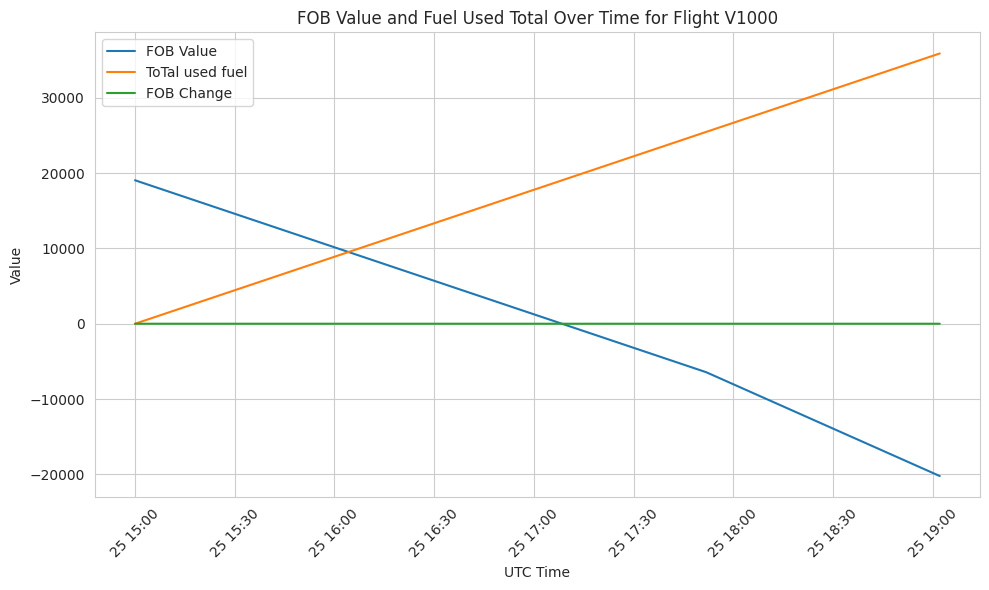

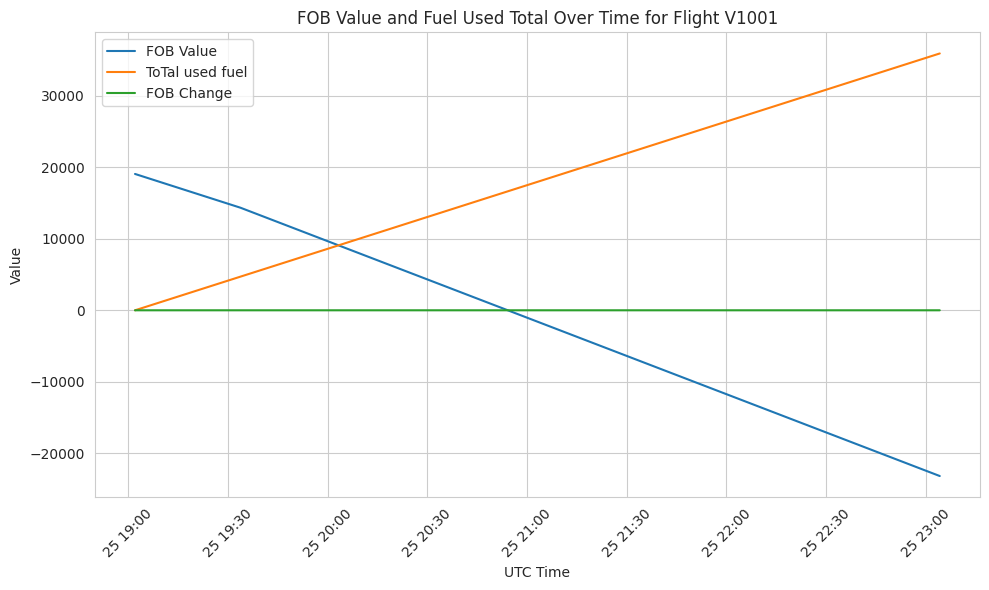

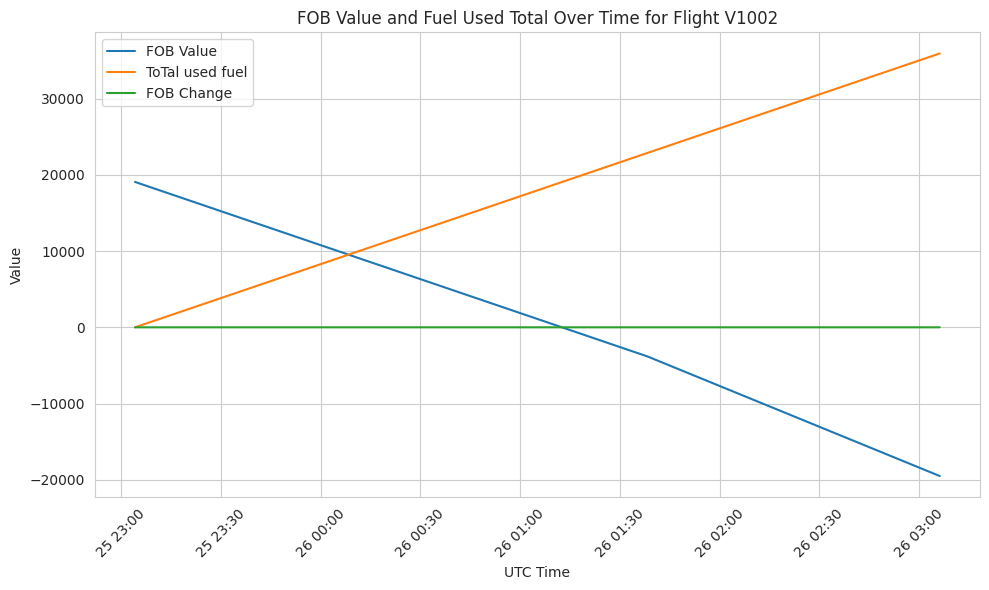

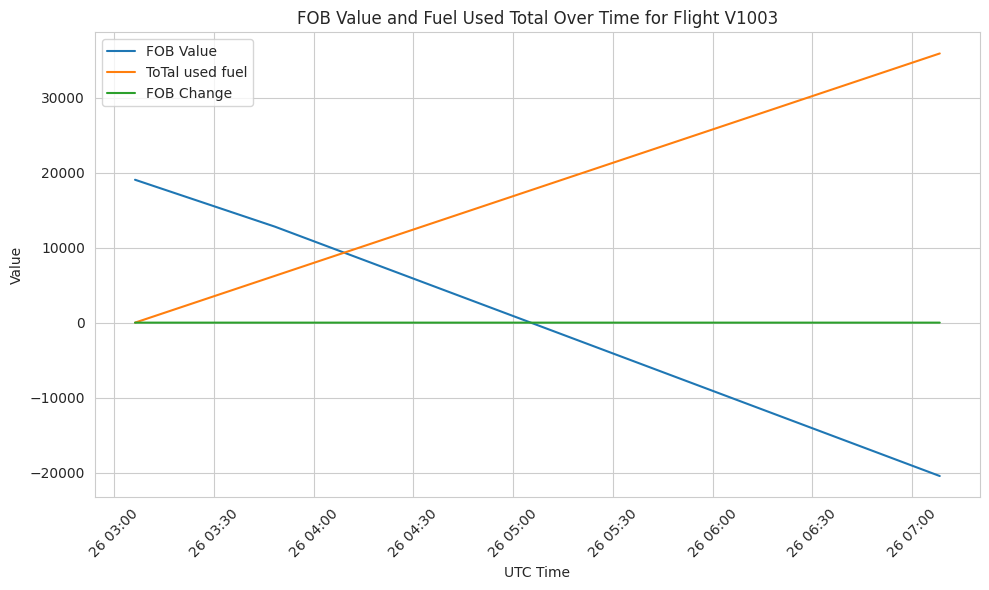

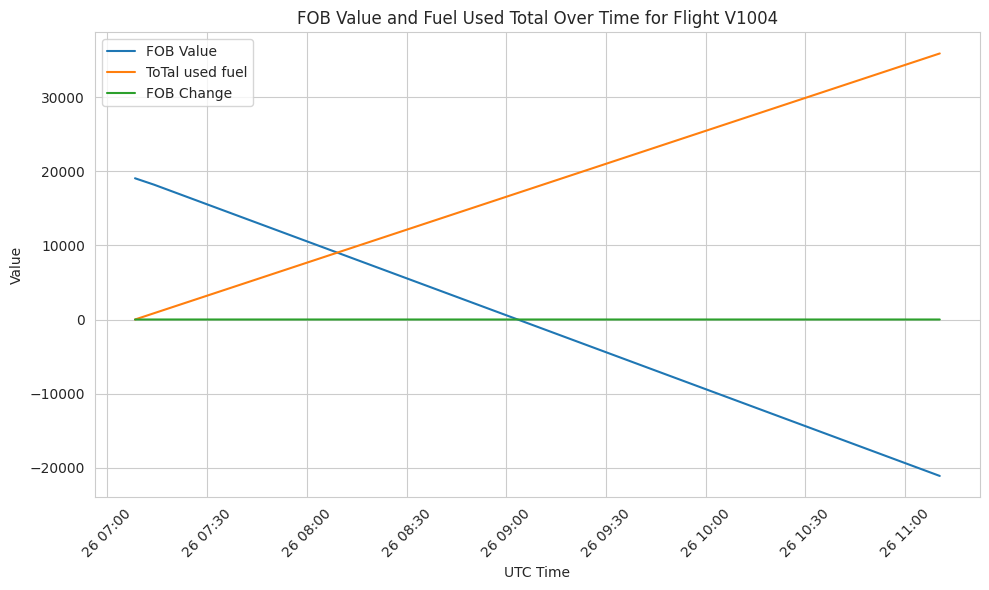

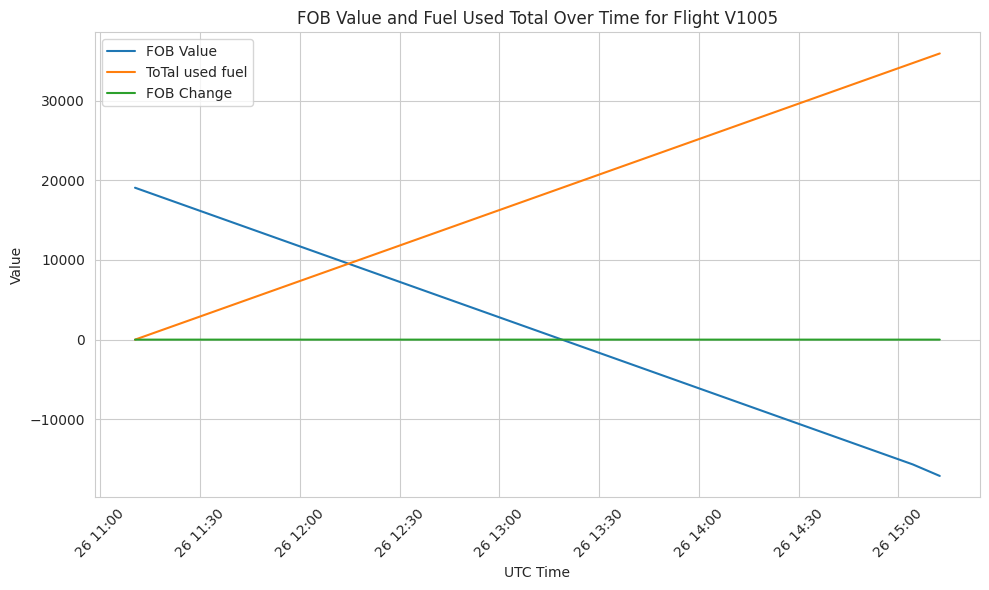

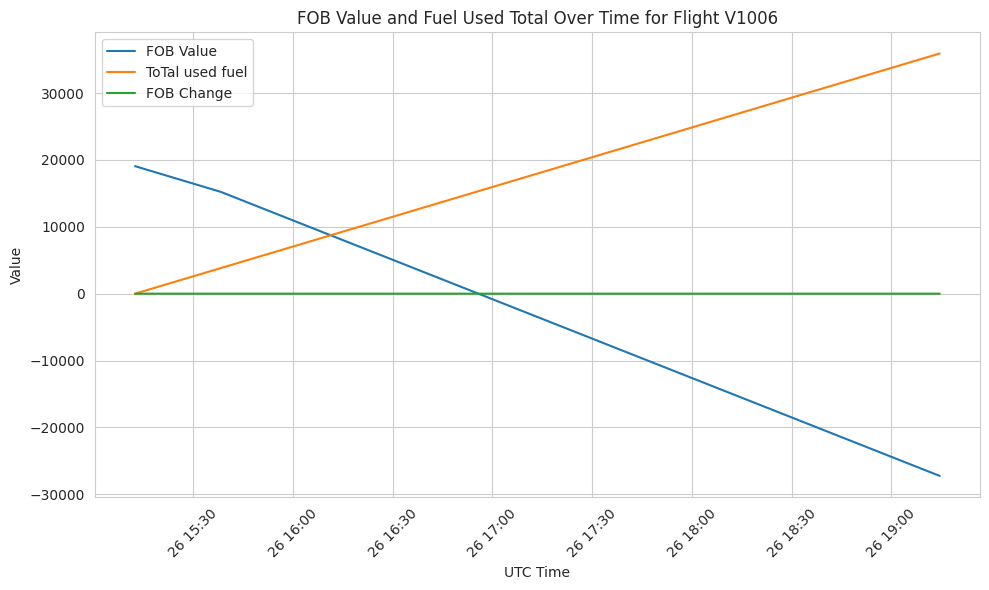

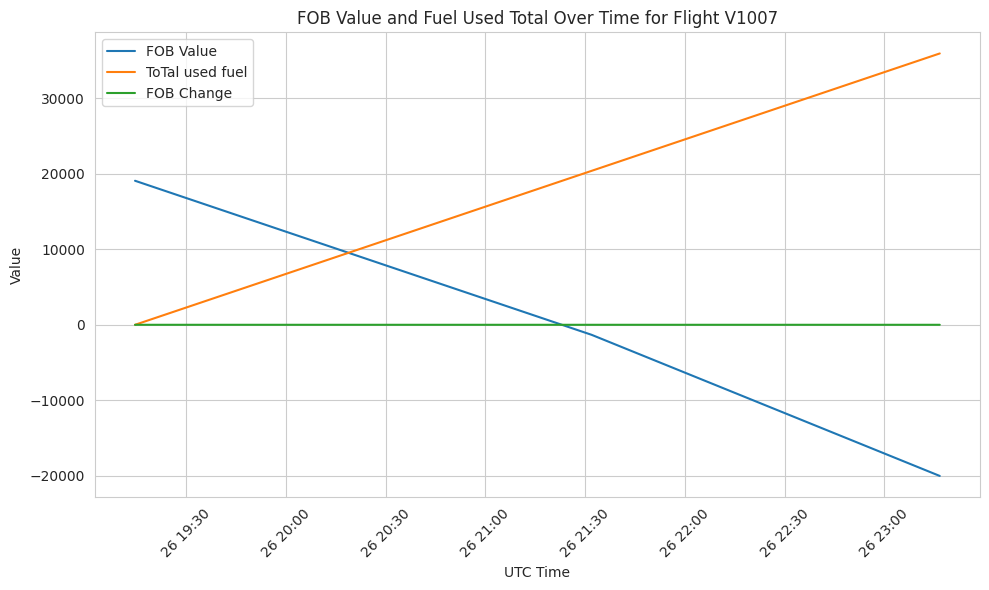

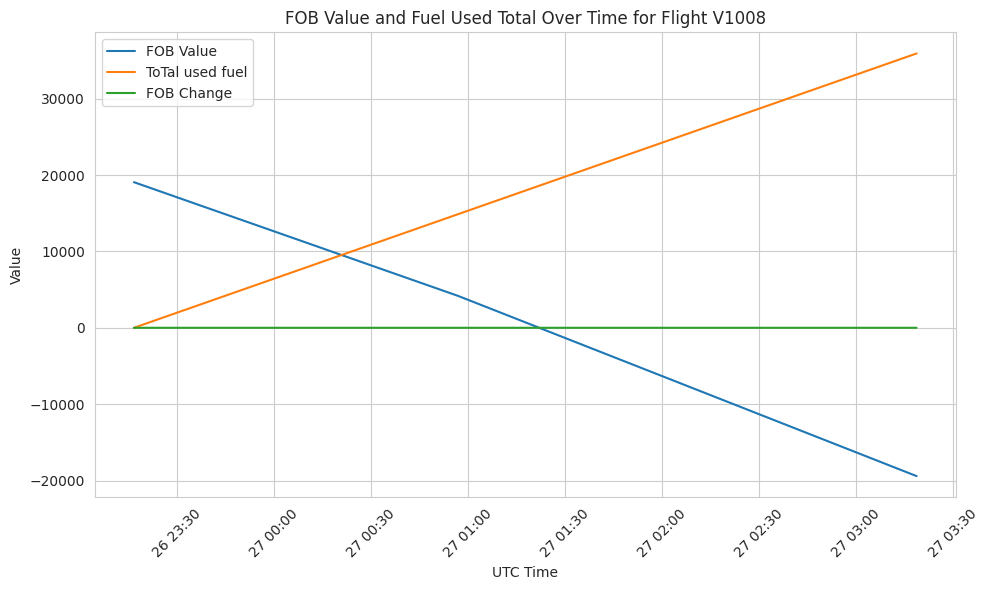

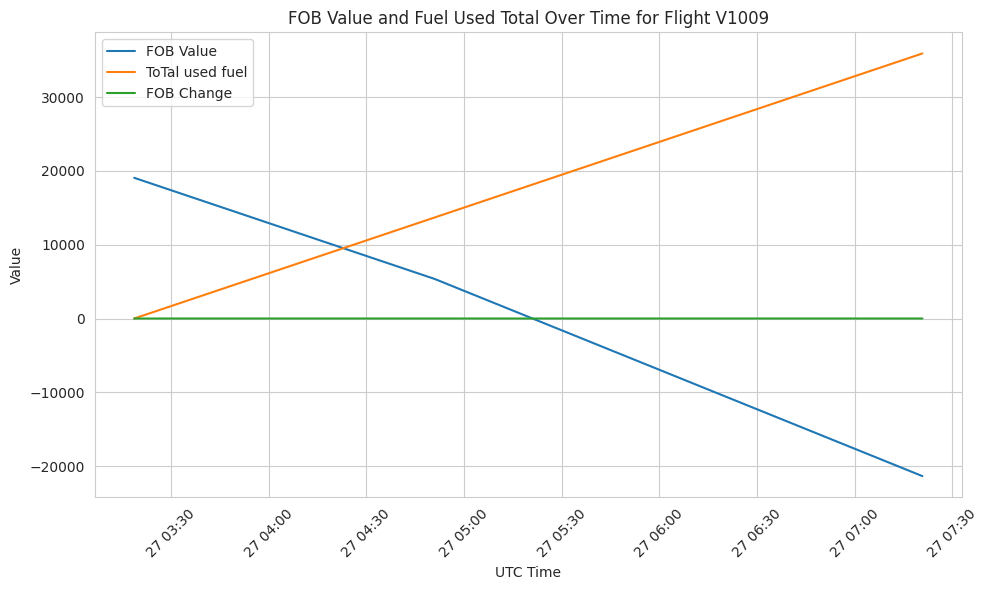

In [ ]:
for element in list(msn02_artificial_flights["Flight"].unique()):
  import matplotlib.pyplot as plt
  relation_FOB_FUSED = msn02[msn02["Flight"] == element]# & (msn10["FLIGHT_PHASE_COUNT"] == 8)]
  # Plotting
  plt.figure(figsize=(10, 6))
  plt.plot(relation_FOB_FUSED['UTC_TIME'], relation_FOB_FUSED['VALUE_FOB'], label='FOB Value')
  plt.plot(relation_FOB_FUSED['UTC_TIME'], relation_FOB_FUSED['FUEL_USED_TOTAL'], label="ToTal used fuel")
  plt.plot(relation_FOB_FUSED['UTC_TIME'], relation_FOB_FUSED['FOB_change'], label='FOB Change')
  plt.plot(relation_FOB_FUSED['UTC_TIME'], relation_FOB_FUSED['FUEL_USED_change'], label='Change in Fuel Used')
  plt.xlabel('UTC Time')
  plt.ylabel('Value')
  plt.title(f'FOB Value and Fuel Used Total Over Time for Flight {element}')
  plt.legend()
  plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
  plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
  plt.show()

In [ ]:
# Calculate mean LEAKAGE and LEAKAGE_smoothed per flight
leakage_stats = msn02_artificial_flights.groupby('Flight').agg({
    'LEAKAGE': ['mean', 'sum', 'median']

}).reset_index()

print(leakage_stats)


  Flight      LEAKAGE                          
                 mean         sum        median
0  V1000   493.796627   7172396.0  1.818989e-12
1  V1001  2755.784200  40027765.5  2.695500e+03
2  V1002   484.663373   7039735.5  1.818989e-12
3  V1003  1500.629639  21796645.5  1.437600e+03
4  V1004  2091.883539  30384608.4  2.091000e+03
5  V1005     4.573838     66435.0  0.000000e+00
6  V1006  4652.254898  67574002.4  4.588000e+03
7  V1007   686.280723   9968227.5  1.818989e-12
8  V1008   757.317026  11000029.8  3.903000e+02
9  V1009  1399.574974  20328826.5  8.775000e+02


In [ ]:
# Sum of LEAKAGE per flight
leakage_sum_per_flight = msn02_artificial_flights.groupby('Flight')['LEAKAGE'].sum().reset_index(name='LEAKAGE_sum')
leakage_sum_per_flight

Flight  LEAKAGE_sum
0  V1000    7172396.0
1  V1001   40027765.5
2  V1002    7039735.5
3  V1003   21796645.5
4  V1004   30384608.4
5  V1005      66435.0
6  V1006   67574002.4
7  V1007    9968227.5
8  V1008   11000029.8
9  V1009   20328826.5

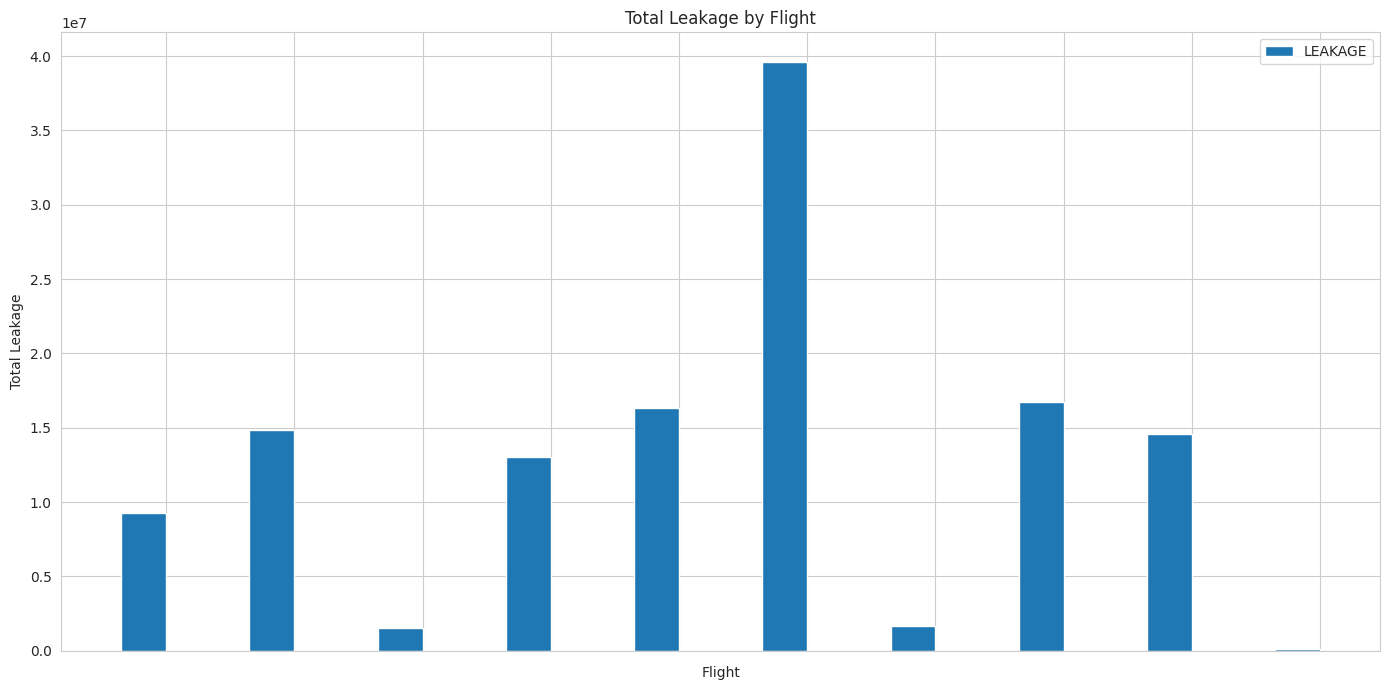

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming leakage_sum_per_flight and leakage_smoothed_sum_per_flight are correctly defined

# Merge the two DataFrames for easier plotting
# Set up the plot
plt.figure(figsize=(14, 7))

# Number of flights
n_flights = len(leakage_sum_per_flight['Flight'])
# The x location for the groups
ind = np.arange(n_flights)
# The width of the bars
width = 0.35

# Plotting LEAKAGE
plt.bar(ind - width/2, leakage_sum_per_flight['LEAKAGE_sum'], width, label='LEAKAGE')


# Add some text for labels, title, and custom x-axis tick labels, etc.
plt.xlabel('Flight')
plt.ylabel('Total Leakage')
plt.title('Total Leakage by Flight')

# Custom x-axis tick labels
plt.xticks(ind, merged_leakage['Flight'], rotation='vertical')

plt.legend()

plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels

plt.show()
